# DL revfilt 
    * business with more than 699 reviews (before lang filter)
    * 1000 restaurants
    * 1M reviews (988000)

In [36]:
import time
import pandas as pd

start = time.time()
revfilt=pd.read_feather('input/revfilt')
print(time.time()-start)

3.074863910675049


In [2]:
revfilt

business_id               review_id  \
0       --UNNdnHRhsyFUbDgumdtQ  zEbafoN-Vo2wQbCj1whMfg   
1       --UNNdnHRhsyFUbDgumdtQ  a6NrSv_T4EYF3owwSZHl3A   
2       --UNNdnHRhsyFUbDgumdtQ  JEzFYK2E2LW9B5YwAxG3Ng   
3       --UNNdnHRhsyFUbDgumdtQ  PilFuCiQSt3LIdZVA3euHA   
4       --UNNdnHRhsyFUbDgumdtQ  ONrCx42m0dEkm9tnSyhonQ   
...                        ...                     ...   
988617  zxQ7WxWAhp6l_M3iIm2x8w  RRg9df82YuROb9hGgmjxDA   
988618  zxQ7WxWAhp6l_M3iIm2x8w  kwLM158ERVGYZV2P3sLm7w   
988619  zxQ7WxWAhp6l_M3iIm2x8w  ZS3iGNFgJMdtO9UeB6ABFw   
988620  zxQ7WxWAhp6l_M3iIm2x8w  3efd3hFxQcgXzA8fz-lVKw   
988621  zxQ7WxWAhp6l_M3iIm2x8w  IOY4XQGv-CoAG_sEJDKXiQ   

                       user_id  stars  useful  funny  cool  \
0       8xUL29fEjho5onpv1Y3SSg    5.0       6      9     8   
1       JMCgXoNmSWJW1zF2ADjxGg    5.0       0      0     0   
2       BI9ROU092o3ZOCvtqkVXLA    5.0       0      0     0   
3       9pN7qSwTbWEF4TGVAhCZSg    5.0       0      0     0   
4       BtT83hxayh9fQsgtAbn1ZA    1.0       0      1     0   
...                        ...    ...     ...    ...   ...   
988617  pBtSoQj6A-AkDQL-8H39Mw    5.0       0      0     1   
988618  2qKOL7C7WbG_M3EOWvTFxA    5.0      13      6    14   
988619  ISEmeWUUh6bXiUvy58Jxng    5.0       6      0     0   
988620  bLbSNkLggFnqwNNzzq-Ijw    4.0       8      6     7   
988621  9H79JisaFhbA_NsYG4TfEw    5.0       2      0     1   

                                                     text  \
0       Le Pigeon is a dining experience that's a lot ...   
1       We felt so attended to with our meal. Two of o...   
2       This dirty bird does not taste like chicken.  ...   
3       Simply amazing. Our waiter,  Danny, was very k...   
4       I'm so sad to give this place such a low score...   
...                                                   ...   
988617  5 stars - This place is so much fun and I high...   
988618  TLDR: you could come here for a month straight...   
988619  Whenever I am back home, I feel a need to visi...   
988620  LA has Grand Central Market, SF has Fisherman'...   
988621  Many people have mentioned this as a good plac...   

                       date  \
0       2015-08-19 06:23:33   
1       2018-04-27 20:00:45   
2       2016-07-25 05:36:49   
3       2016-05-31 04:14:17   
4       2018-09-03 05:20:00   
...                     ...   
988617  2019-05-29 20:39:38   
988618  2018-06-26 21:13:04   
988619  2015-04-18 01:04:37   
988620  2016-04-03 10:17:38   
988621  2008-08-23 17:55:56   

                                                    text2 lang      conf  \
0       Le Pigeon is a dining experience that's a lot ...   en  0.958076   
1       We felt so attended to with our meal. Two of o...   en  0.983113   
2       This dirty bird does not taste like chicken.  ...   en  0.964695   
3       Simply amazing. Our waiter,  Danny, was very k...   en  0.993041   
4       I'm so sad to give this place such a low score...   en  0.989865   
...                                                   ...  ...       ...   
988617  5 stars - This place is so much fun and I high...   en  0.980922   
988618  TLDR: you could come here for a month straight...   en  0.976768   
988619  Whenever I am back home, I feel a need to visi...   en  0.975437   
988620  LA has Grand Central Market, SF has Fisherman'...   en  0.965678   
988621  Many people have mentioned this as a good plac...   en  0.972160   

        review_count  
0               1236  
1               1236  
2               1236  
3               1236  
4               1236  
...              ...  
988617           888  
988618           888  
988619           888  
988620           888  
988621           888  

[988622 rows x 13 columns]

In [44]:
#test spacy
# https://spacy.io/models
#DL les pipelines preentrainés via la cmd
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


# cleaning

In [46]:
#https://inside-machinelearning.com/preprocessing-nlp-tutoriel-pour-nettoyer-rapidement-un-texte/
#https://towardsdatascience.com/text-normalization-with-spacy-and-nltk-1302ff430119

import re #module regex
import nltk
import string
from nltk.stem import WordNetLemmatizer
#tous les dictionnaires: https://www.nltk.org/nltk_data/
from nltk.corpus import words


 #DL des stopwords NLTK
#nltk.download('stopwords')
 #DL des punctuations NLTK
#nltk.download('punkt')
 #DL du dictionnaire de mots anglais NTLK
#nltk.download('words')
 #DL pour la lemmatization
#nltk.download('wordnet')


#stopwords anglais
#attention les stopwords n'est pas une liste absolue
stopwords = nltk.corpus.stopwords.words('english')
more_stopwords = ['us', 'im', 'c', "youre", "youve", "youll", "youd", "thatll", 
                  "shouldve", "arent", "couldnt", "didnt","doesnt","dont", "hadnt", 
                  "hasnt", "havent", "isnt", "mightnt", "mustnt", "neednt", 
                  "shant", "shouldnt", "wasnt", "werent", "wont", "wouldnt"]
stopwords = stopwords + more_stopwords

#mots anglais du dictionnaire NLTK
#tous les dictionnaires: https://www.nltk.org/nltk_data/
#set() permet d'avoir un mot unique
words = set(nltk.corpus.words.words())
#words = set(nltk.corpus.brown.words())

wnl = WordNetLemmatizer()

def Preprocess_npl(listofdoc):
    '''cleaning + lemmatization
    sub=substitute'''
    preprocess_list = []
    for doc in listofdoc :
        #remove text in square brackets: .(any caracter) * (0 or more times) ?\] (0 or 1 time ']')
        doc = re.sub('\[.*?\]', '', doc)
        #remove links
        doc = re.sub('https?://\S+|www\.\S+', '', doc)
        doc = re.sub('http?://\S+|www\.\S+', '', doc)
        ##remove text in angle brackets
        doc = re.sub('<.*?>+', '', doc)
        #remove punctuation
        #!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
        #doc = re.sub('[%s]' % re.escape(string.punctuation), '', doc)
        #remove back line
        doc = re.sub('\n', '', doc)
        #word cracter digit word caracter
        #doc = re.sub('\w*\d\w*', '', doc)
    
        #la fonction join permet de creer un separateur
        #lowercase & remove punctuation : example: Don't->dont
        doc_wo_punct = "".join([i.lower() for i in doc if i not in string.punctuation])
        #remove number
        doc_wo_num = ''.join(i for i in doc_wo_punct if not i.isdigit())
        #tokenization
        token_doc = nltk.tokenize.word_tokenize(doc_wo_num)
        #remove stopwords
        words_wo_stopwords = [i for i in token_doc if i not in stopwords]
        
        #lemmatization
        #attention ici on cree un generateur et non une liste: (wnl.lemmatize(w) for w in words_wo_stopwords) different de [wnl.lemmatize(w) for w in words_wo_stopwords]
        #la difference et qu on recupere à la demande
        #https://stackoverflow.com/questions/47789/generator-expressions-vs-list-comprehensions
        words_lemmatize = (wnl.lemmatize(w) for w in words_wo_stopwords)
        
        #on ne retourne que les mots appartenant au dictionnaire words  et ne possédant pas autre chose que des carcatère de l'alphabet
        doc_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        preprocess_list.append(doc_clean)
    return preprocess_list


start = time.time()
revfilt['text3'] =Preprocess_npl(revfilt.text2)
print(time.time()-start)

890.0445592403412


In [47]:
revfilt

business_id               review_id  \
0       --UNNdnHRhsyFUbDgumdtQ  zEbafoN-Vo2wQbCj1whMfg   
1       --UNNdnHRhsyFUbDgumdtQ  a6NrSv_T4EYF3owwSZHl3A   
2       --UNNdnHRhsyFUbDgumdtQ  JEzFYK2E2LW9B5YwAxG3Ng   
3       --UNNdnHRhsyFUbDgumdtQ  PilFuCiQSt3LIdZVA3euHA   
4       --UNNdnHRhsyFUbDgumdtQ  ONrCx42m0dEkm9tnSyhonQ   
...                        ...                     ...   
988617  zxQ7WxWAhp6l_M3iIm2x8w  RRg9df82YuROb9hGgmjxDA   
988618  zxQ7WxWAhp6l_M3iIm2x8w  kwLM158ERVGYZV2P3sLm7w   
988619  zxQ7WxWAhp6l_M3iIm2x8w  ZS3iGNFgJMdtO9UeB6ABFw   
988620  zxQ7WxWAhp6l_M3iIm2x8w  3efd3hFxQcgXzA8fz-lVKw   
988621  zxQ7WxWAhp6l_M3iIm2x8w  IOY4XQGv-CoAG_sEJDKXiQ   

                       user_id  stars  useful  funny  cool  \
0       8xUL29fEjho5onpv1Y3SSg    5.0       6      9     8   
1       JMCgXoNmSWJW1zF2ADjxGg    5.0       0      0     0   
2       BI9ROU092o3ZOCvtqkVXLA    5.0       0      0     0   
3       9pN7qSwTbWEF4TGVAhCZSg    5.0       0      0     0   
4       BtT83hxayh9fQsgtAbn1ZA    1.0       0      1     0   
...                        ...    ...     ...    ...   ...   
988617  pBtSoQj6A-AkDQL-8H39Mw    5.0       0      0     1   
988618  2qKOL7C7WbG_M3EOWvTFxA    5.0      13      6    14   
988619  ISEmeWUUh6bXiUvy58Jxng    5.0       6      0     0   
988620  bLbSNkLggFnqwNNzzq-Ijw    4.0       8      6     7   
988621  9H79JisaFhbA_NsYG4TfEw    5.0       2      0     1   

                                                     text  \
0       Le Pigeon is a dining experience that's a lot ...   
1       We felt so attended to with our meal. Two of o...   
2       This dirty bird does not taste like chicken.  ...   
3       Simply amazing. Our waiter,  Danny, was very k...   
4       I'm so sad to give this place such a low score...   
...                                                   ...   
988617  5 stars - This place is so much fun and I high...   
988618  TLDR: you could come here for a month straight...   
988619  Whenever I am back home, I feel a need to visi...   
988620  LA has Grand Central Market, SF has Fisherman'...   
988621  Many people have mentioned this as a good plac...   

                       date  \
0       2015-08-19 06:23:33   
1       2018-04-27 20:00:45   
2       2016-07-25 05:36:49   
3       2016-05-31 04:14:17   
4       2018-09-03 05:20:00   
...                     ...   
988617  2019-05-29 20:39:38   
988618  2018-06-26 21:13:04   
988619  2015-04-18 01:04:37   
988620  2016-04-03 10:17:38   
988621  2008-08-23 17:55:56   

                                                    text2 lang      conf  \
0       Le Pigeon is a dining experience that's a lot ...   en  0.958076   
1       We felt so attended to with our meal. Two of o...   en  0.983113   
2       This dirty bird does not taste like chicken.  ...   en  0.964695   
3       Simply amazing. Our waiter,  Danny, was very k...   en  0.993041   
4       I'm so sad to give this place such a low score...   en  0.989865   
...                                                   ...  ...       ...   
988617  5 stars - This place is so much fun and I high...   en  0.980922   
988618  TLDR: you could come here for a month straight...   en  0.976768   
988619  Whenever I am back home, I feel a need to visi...   en  0.975437   
988620  LA has Grand Central Market, SF has Fisherman'...   en  0.965678   
988621  Many people have mentioned this as a good plac...   en  0.972160   

        review_count                                              text3  
0               1236  pigeon dining experience thats lot like fallin...  
1               1236  felt meal two party four food sensitivity seat...  
2               1236  dirty bird taste like chicken far better city ...  
3               1236  simply amazing waiter knowledgeable friendly t...  
4               1236  sad give place low score course tasting menu l...  
...              ...                                                ...  
988617           888  star place much fu

# stemming

Pour l'anglais les stemmers et lemmatizeurs dispo sur NLTK
* NLTK : **PorterStemmer** suffix stripping 
    strength: **simplicity & fast**
    constraint: 62 rules & no dictionnary lookup => **not often real english words**
* NLTK : **SnowballStemmers** used to create non-English Stemmers
* NLTK : **LancasterStemmer** Paice-Husk iterative algorithm with lots of rules 


In [48]:
#https://stackoverflow.com/questions/10554052/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-alg
from nltk.stem.porter import PorterStemmer #less aggressive
from nltk.stem.snowball import SnowballStemmer #kind of Porter2 (probably first choice) :0.78sec pour 1000
from nltk.stem.lancaster import LancasterStemmer #most aggressive
from nltk.stem import WordNetLemmatizer #fast
#nltk.download('wordnet')

def stemm_data(data,colin,colout,typ,algo):
    '''type: stemmer/lemmatizer
        stemmer algo: 
            nltk.PorterStemmer()
            nltk.SnowballStemmer("english")
            nltk.LancasterStemmer()
        lemme algo:
            nltk.WordNetLemmatizer()
            '''
    if typ=='stemmer':
        stemmer = algo
        def stemm_text(text):
            text = ' '.join(stemmer.stem(word) for word in text.split(' '))
            return text
    elif typ=='lemmatizer':
        lemmatizer = algo
        def stemm_text(text):
            text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
            return text
        
    data[colout] = data[colin].apply(stemm_text)
    return data


#start = time.time()
#revfilt=stemm_data(data=revfilt,colin='text4',colout='lemm',typ='lemmatizer',algo=nltk.WordNetLemmatizer())
#print(time.time()-start)

start = time.time()
revfilt=stemm_data(data=revfilt,colin='text3',colout='stemm',typ='stemmer',algo=nltk.SnowballStemmer("english"))
print(time.time()-start)


565.0301156044006


In [49]:
#sauvegarde
start = time.time()
revfilt=revfilt.reset_index()
revfilt.to_feather('input/revfilt2')
print(time.time()-start)

4.584313869476318


# wordcloud visualization

In [ ]:
import sys
#!{sys.executable} -m pip install wordcloud

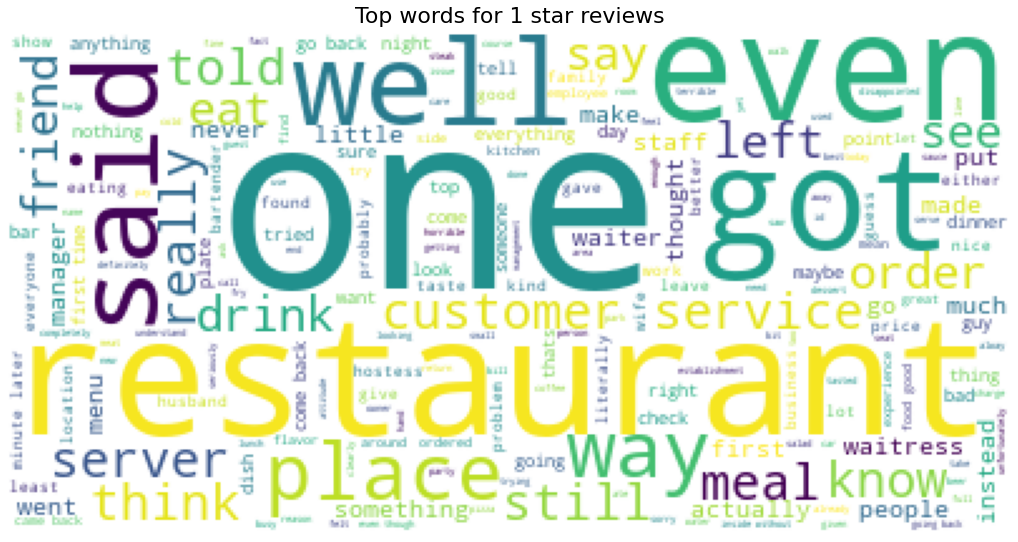

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in revfilt.loc[revfilt['stars'] == 1, 'text3']))
plt.figure(figsize=(18,10))
plt.title('Top words for 1 star reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

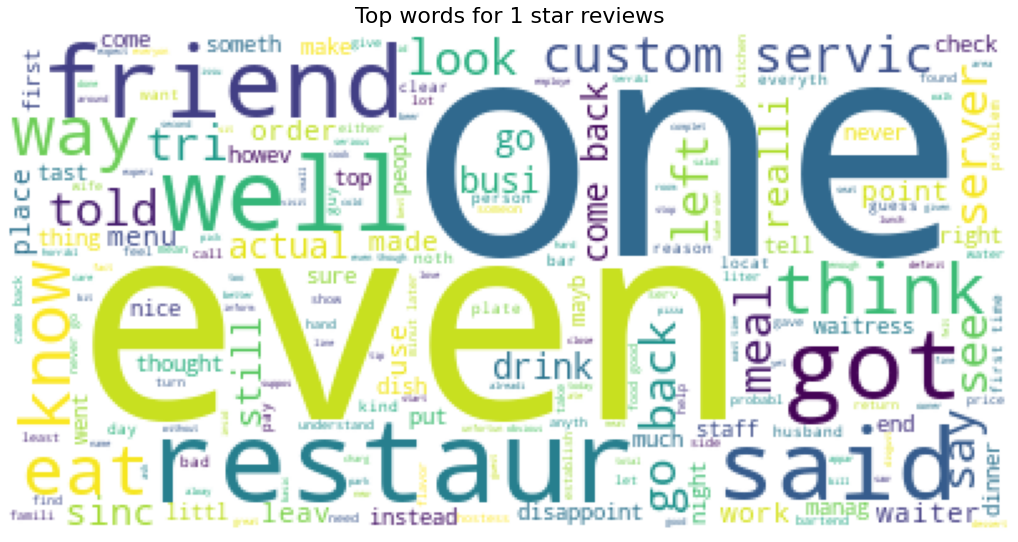

In [51]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in revfilt.loc[revfilt['stars'] == 1, 'stemm']))
plt.figure(figsize=(18,10))
plt.title('Top words for 1 star reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

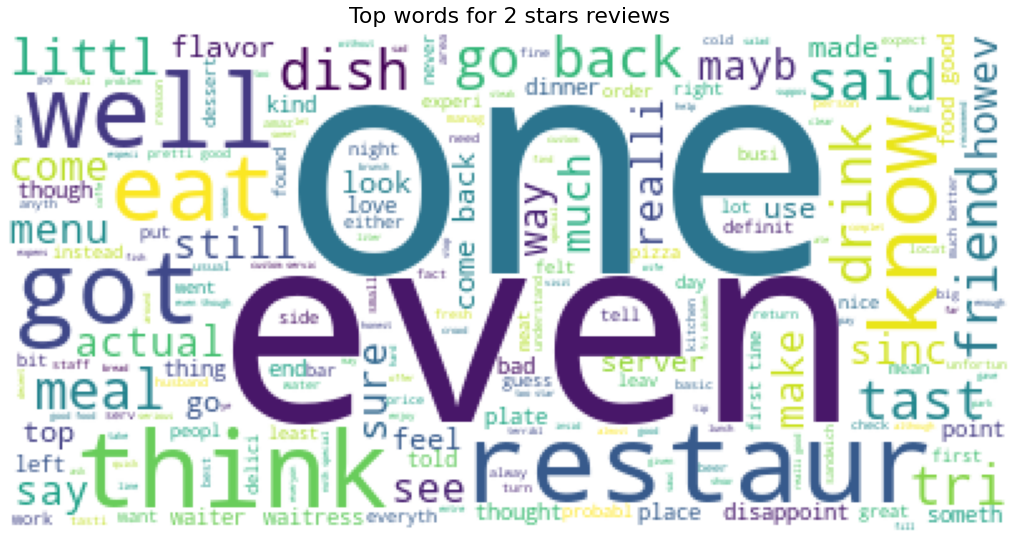

In [52]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in revfilt.loc[revfilt['stars'] == 2, 'stemm']))
plt.figure(figsize=(18,10))
plt.title('Top words for 2 stars reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

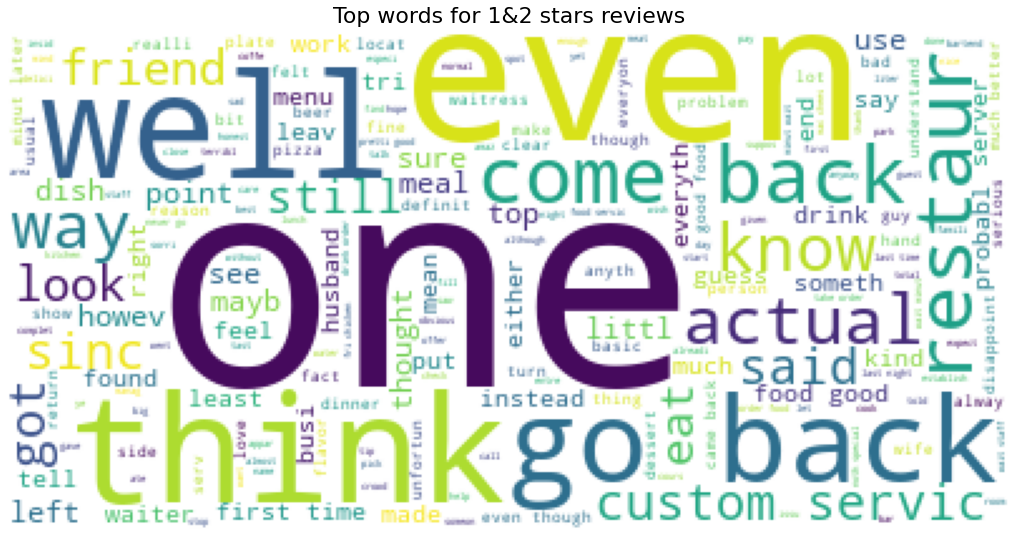

In [53]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in revfilt.loc[revfilt['stars'] <= 2, 'stemm']))
plt.figure(figsize=(18,10))
plt.title('Top words for 1&2 stars reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

# TEXT FEATURE EXTRACTION: VECTORIZATION
* **BAG OF WORDS** representation
    * **tokenizing** (integer id ofr each possible tokens separated by white spaces and punctuation
    * **counting**
    * **normalizing** (diminishing importance tokens that occur in the majority of samples
    * **VECTORIZATION**
        * each individual token occurence frequency is a feature
        * corpus of doc is represented by a matrix (line=doc, column=token)
        * **Bag of Words/n-grams** = strategy tokenization-counting-normalizing
        * **sparsity** 99% of features will be 0
        * **ALGO**: **CountVectorizer** from sklearn
        * **alternative**: **HashingVectorizer**:
            * good candidate if we are using a large dataset for your machine learning tasks and you have no use for the resulting dictionary of tokens
            * advantages:
                * no storage of vocab dictionary: better for large datasets
                * fast to pickle & unpickle
                * no state computing during fit
            * cons:
                * not be possible to retrieve the actual token given the column position. This would be especially important in tasks like keyword extraction
                * no inverse transform
                * distincts tokens can be mapped in the same feature
                    rarely an issue if n-features is large 2**18
                * no idf weighting
                
* **BAG OF WORDS** limitations
    * collection of unigrams cannot capture phrase and multi word expressions, no word dependance
        * n-grams to the rescue
    * doesn t take into account potential mispellings and derivations
        * collection of character n-grams to the rescue

In [2]:
import time
import pandas as pd

start = time.time()
revfilt=pd.read_feather('input/revfilt2')
print(time.time()-start)

3.997626781463623


In [2]:
#tokenization & occurence counting
#defaut tokenization : words with at least 2 letters but extractable token pattern
# analyser: {‘word’, ‘char’, ‘char_wb’}
# ngram_range:(1,2) means unigram & bigram
# max_df min_df: if float: proportion threshold to ignore for vocabulary
# binarybool, default=False
from sklearn.feature_extraction.text import CountVectorizer
#convert a collection of text doc to a matrix of token counts

x = revfilt['text3']
x1 = revfilt.loc[revfilt.stars==1,'text3']
x5 = revfilt.loc[revfilt.stars==5,'text3']

y = revfilt['stars']

vect = CountVectorizer(stop_words = 'english',
                       ngram_range = (1,2),
                       max_features = 100)
start = time.time()
x_vec = vect.fit_transform(x)
features1 = vect.get_feature_names_out()
x1_vec = vect.fit_transform(x1)
features2 = vect.get_feature_names_out()
x5_vec = vect.fit_transform(x5)
features3 = vect.get_feature_names_out()
print(time.time()-start)

##########avec l'option binaire afin de voir la frequence reel du mot dans le corpus (2 mots dans un doc = 1 mot)

vect_bin = CountVectorizer(stop_words = 'english',
                       ngram_range = (1,2),
                       max_features = 100,
                       binary=True)
start = time.time()
x_vec_bin = vect_bin.fit_transform(x)
features1_bin = vect_bin.get_feature_names_out()
x1_vec_bin = vect_bin.fit_transform(x1)
features2_bin = vect_bin.get_feature_names_out()
x5_vec_bin = vect_bin.fit_transform(x5)
features3_bin = vect_bin.get_feature_names_out()
print(time.time()-start)

134.42402982711792
143.52399516105652


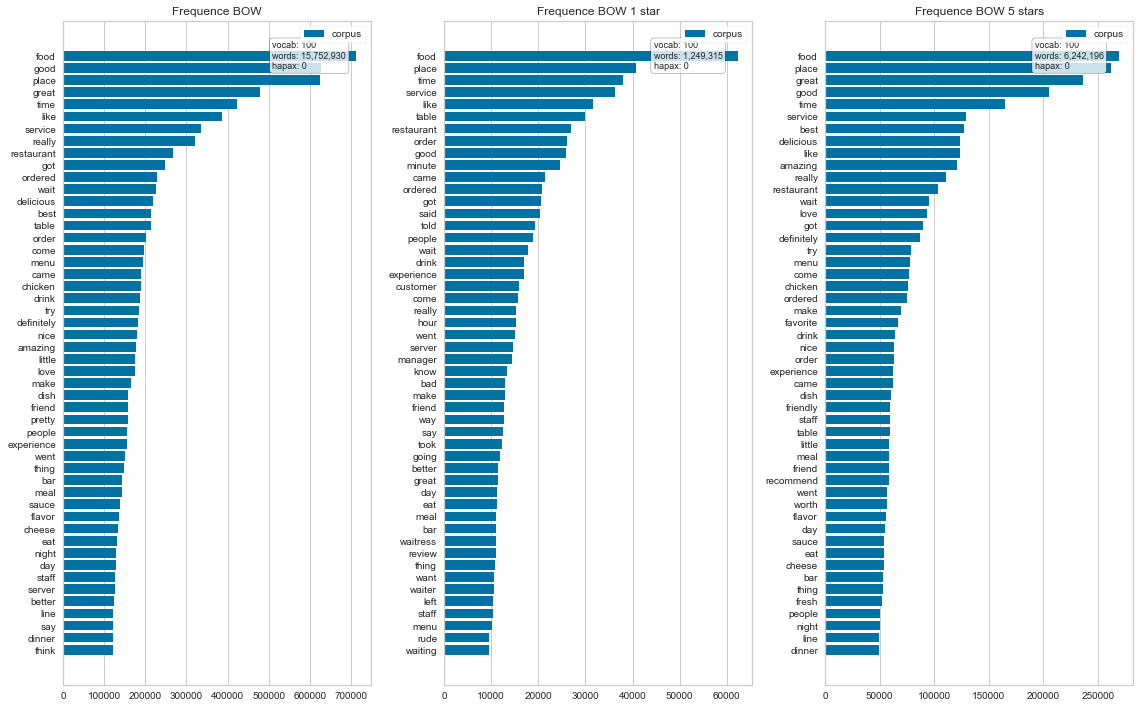

In [3]:
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 3)


visualizer1 = FreqDistVisualizer(features=features1, orient='h',ax=axes[0])
visualizer1.fit(x_vec)
visualizer1.finalize()
axes[0].set_title('Frequence BOW')

visualizer1 = FreqDistVisualizer(features=features2, orient='h',ax=axes[1])
visualizer1.fit(x1_vec)
visualizer1.finalize()
axes[1].set_title('Frequence BOW 1 star')

visualizer5 = FreqDistVisualizer(features=features3, orient='h',ax=axes[2])
visualizer5.fit(x5_vec)
visualizer5.finalize()
axes[2].set_title('Frequence BOW 5 stars')

plt.show()



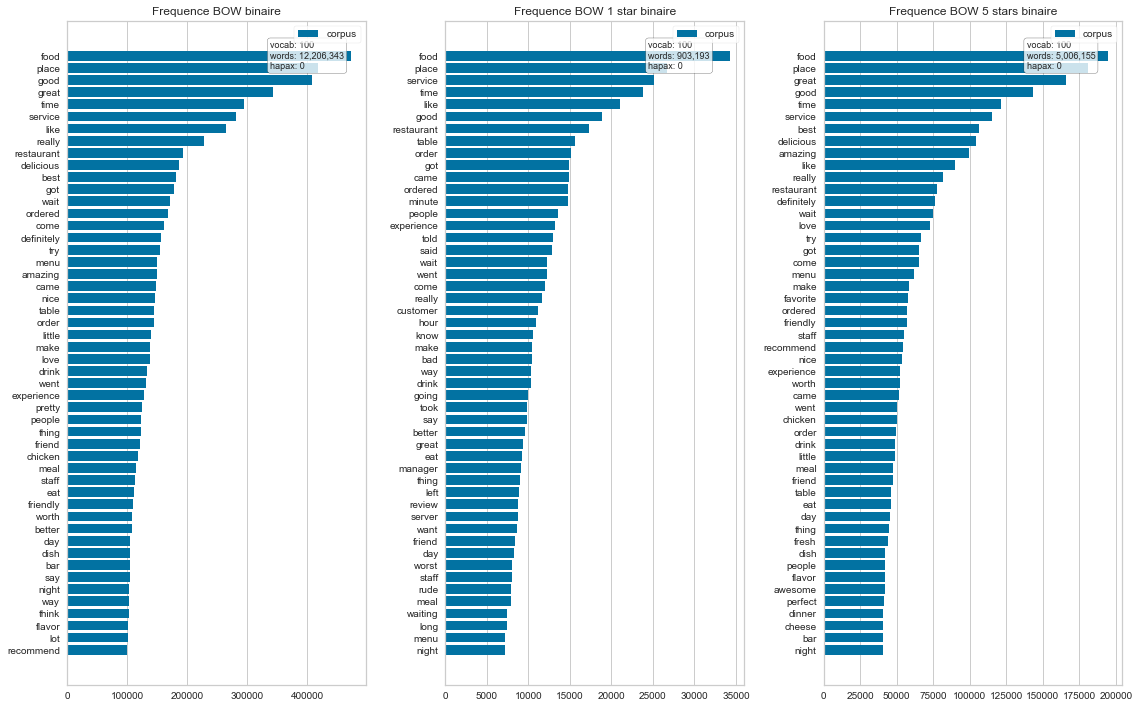

In [4]:
#en binaire on obtient le nombre de doc dans lequel se trouve un mot

from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 3)


visualizer1 = FreqDistVisualizer(features=features1_bin, orient='h',ax=axes[0])
visualizer1.fit(x_vec_bin)
visualizer1.finalize()
axes[0].set_title('Frequence BOW binaire')

visualizer1 = FreqDistVisualizer(features=features2_bin, orient='h',ax=axes[1])
visualizer1.fit(x1_vec_bin)
visualizer1.finalize()
axes[1].set_title('Frequence BOW 1 star binaire')

visualizer5 = FreqDistVisualizer(features=features3_bin, orient='h',ax=axes[2])
visualizer5.fit(x5_vec_bin)
visualizer5.finalize()
axes[2].set_title('Frequence BOW 5 stars binaire')

plt.show()


# TF-IDF Normalization : Term Frequency Inverse Document Frequency
* measure of originality of a word by comparing the number of times a word appears in a doc with the number of doc the word appears in
* reflect how **important** a word is to a document in a collection or corpus
* used as a **weighting factor** in searches of information retrieval, text mining, and user modeling
* tf–idf is one of the most popular term-weighting schemes today
* TF-IDF=number of times in a doc / number of doc with the word under log form
* maybe important to get all the corpus
* **The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently** in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus

    * 2 types of sckit learn functions:
        * **TfidfTransformer** to use after **CountVectorizer**
        * **TfidfVectorizer** combines all the options of **CountVectorizer** & **TfidfTransformer**


* sometimes binary parameter of **CounterVectorizer** might offer better features than tf-idf , more stable
    * model discrete boolean random variables
    * very short texts

* best way to adjust the feature: CV grid search
    * pipelining the feature extractor with a classifier: https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py
    

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

start = time.time()
x_tfidf = tfidf.fit_transform(x_vec)
x1_tfidf = tfidf.fit_transform(x1_vec)
x5_tfidf = tfidf.fit_transform(x5_vec)

x_tfidf_bin = tfidf.fit_transform(x_vec_bin)
x1_tfidf_bin = tfidf.fit_transform(x1_vec_bin)
x5_tfidf_bin = tfidf.fit_transform(x5_vec_bin)
print(time.time()-start)

1.2801251411437988


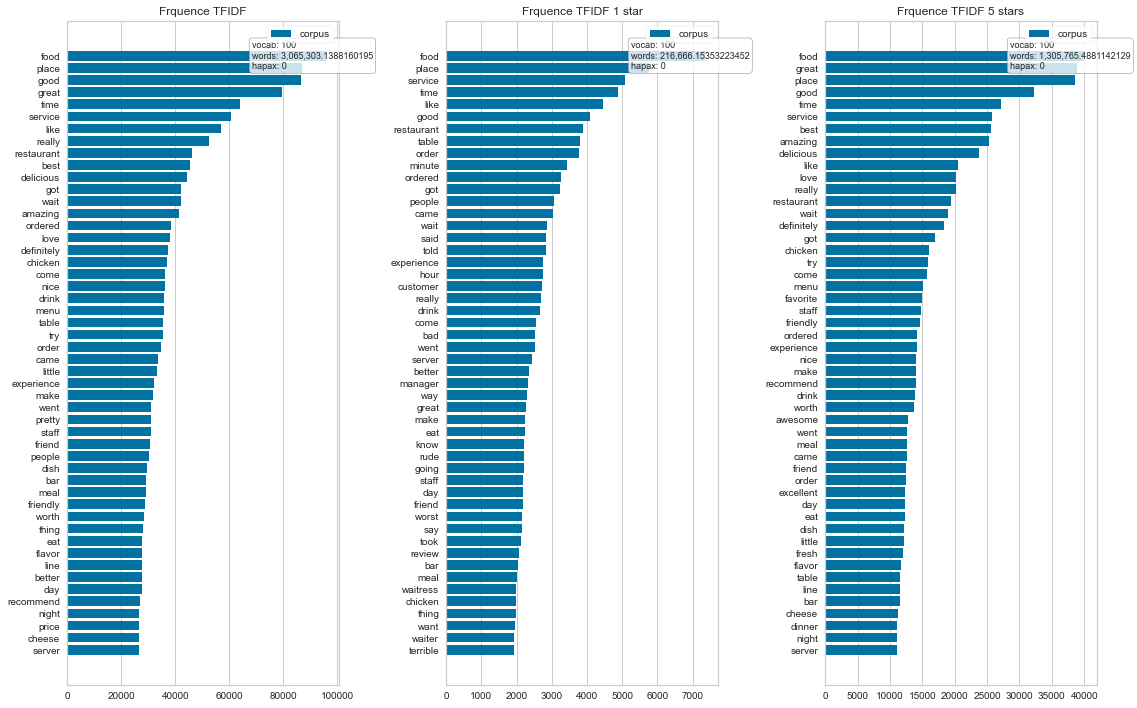

In [6]:
from yellowbrick.text import FreqDistVisualizer

plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 3)


visualizer1 = FreqDistVisualizer(features=features1, orient='h',ax=axes[0])
visualizer1.fit(x_tfidf)
visualizer1.finalize()
axes[0].set_title('Frquence TFIDF')

visualizer1 = FreqDistVisualizer(features=features2, orient='h',ax=axes[1])
visualizer1.fit(x1_tfidf)
visualizer1.finalize()
axes[1].set_title('Frquence TFIDF 1 star')

visualizer5 = FreqDistVisualizer(features=features3, orient='h',ax=axes[2])
visualizer5.fit(x5_tfidf)
visualizer5.finalize()
axes[2].set_title('Frquence TFIDF 5 stars')

plt.show()

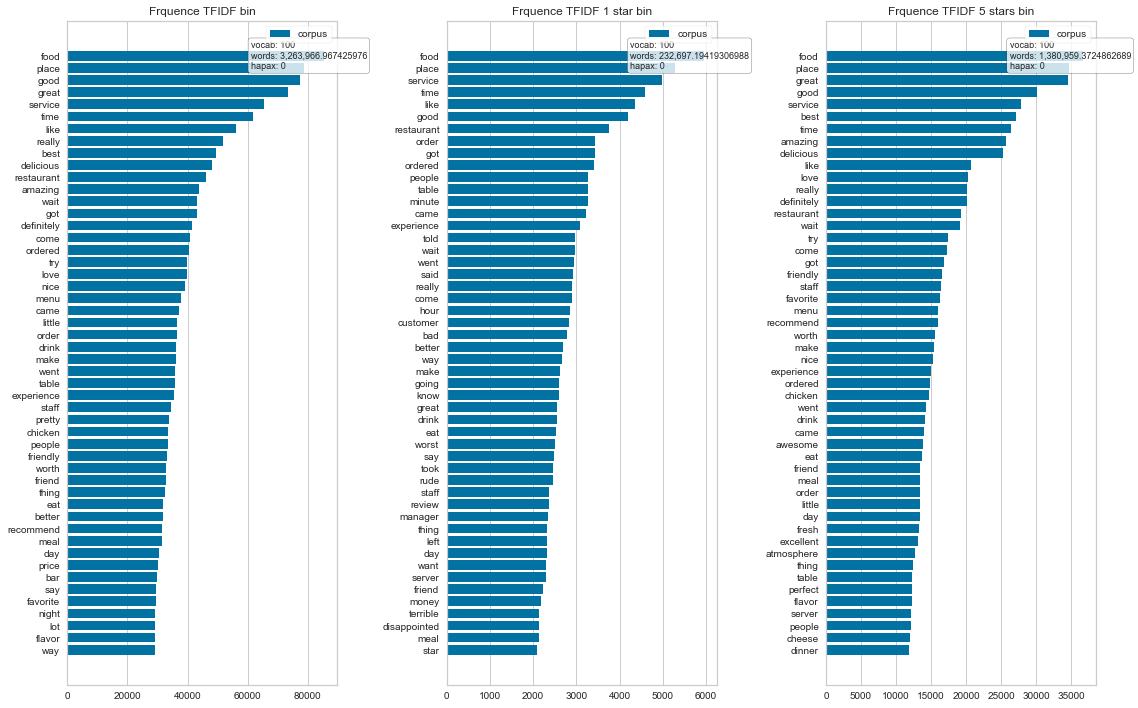

In [7]:
from yellowbrick.text import FreqDistVisualizer

plt.rcParams["figure.figsize"] = [16, 10]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 3)


visualizer1 = FreqDistVisualizer(features=features1_bin, orient='h',ax=axes[0])
visualizer1.fit(x_tfidf_bin)
visualizer1.finalize()
axes[0].set_title('Frquence TFIDF bin')

visualizer1 = FreqDistVisualizer(features=features2_bin, orient='h',ax=axes[1])
visualizer1.fit(x1_tfidf_bin)
visualizer1.finalize()
axes[1].set_title('Frquence TFIDF 1 star bin')

visualizer5 = FreqDistVisualizer(features=features3_bin, orient='h',ax=axes[2])
visualizer5.fit(x5_tfidf_bin)
visualizer5.finalize()
axes[2].set_title('Frquence TFIDF 5 stars bin')

plt.show()

C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like

fit_tsne1: 29.991097927093506


C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like

fit_tsne2: 30.90827202796936


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

fit_tsne3: 31.48355722427368


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

fit_tsne4: 29.435950756072998


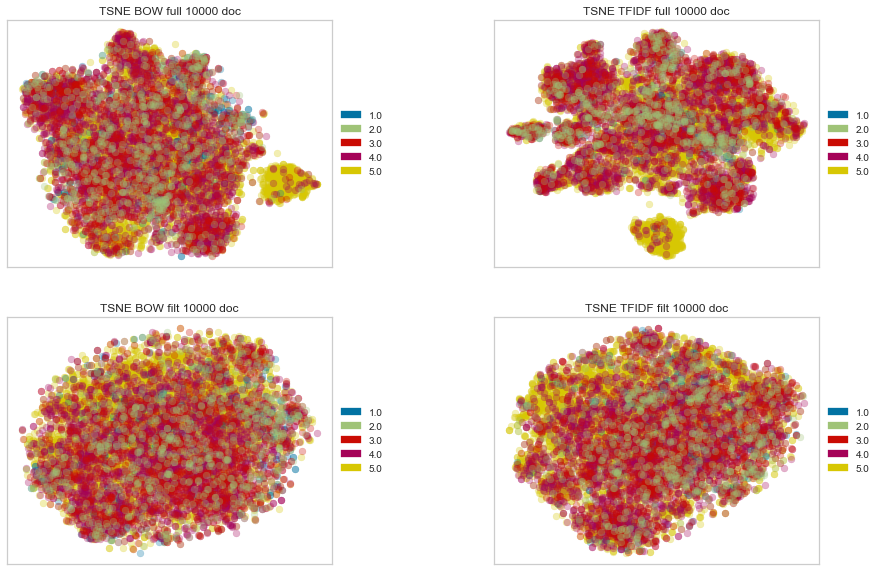

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from yellowbrick.text import TSNEVisualizer
import matplotlib.pyplot as plt

#define doc number to keep
nbdoc=10000

#2 possibilities for vizu
    # extract wanted number of doc before or after vectorization

#initialisation de la vectorisation
bow_full = CountVectorizer()
bow = CountVectorizer(ngram_range=(1, 2),max_df=0.9,min_df=0.1,max_features=200)
tfidf = TfidfTransformer()


X_bow_full = bow_full.fit_transform(revfilt['text3'].head(nbdoc))
X_tfidf_full = tfidf.fit_transform(X_bow_full)

X_bow_filt = bow.fit_transform(revfilt['text3'].head(nbdoc))
X_tfidf_filt = tfidf.fit_transform(X_bow_filt)

y = revfilt['stars'].head(nbdoc)

# Create the visualizer and draw the vectors
plt.rcParams["figure.figsize"] = [16, 10]
#plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(2, 2)

#pour les matrix sparse: il vaut mieux faire un un svd avant, PCA pour les matrices denses
tsne1 = TSNEVisualizer(decompose='svd',decompose_by=50, alpha=0.3,ax=axes[0,0])
tsne2 = TSNEVisualizer(decompose='svd',decompose_by=50, alpha=0.3,ax=axes[0,1])
tsne3 = TSNEVisualizer(decompose='svd',decompose_by=50, alpha=0.3,ax=axes[1,0])
tsne4 = TSNEVisualizer(decompose='svd',decompose_by=50, alpha=0.3,ax=axes[1,1])

start = time.time()
tsne1.fit(X_bow_full, y)
print('fit_tsne1:',time.time()-start) #34 sec pour 10000 doc
tsne1.finalize()
axes[0,0].set_title('TSNE BOW full {} doc'.format(nbdoc))

start = time.time()
tsne2.fit(X_tfidf_full, y)
print('fit_tsne2:',time.time()-start)
tsne2.finalize()
axes[0,1].set_title('TSNE TFIDF full {} doc'.format(nbdoc))

start = time.time()
tsne3.fit(X_bow_filt, y)
print('fit_tsne3:',time.time()-start) #34 sec pour 10000 doc
tsne3.finalize()
axes[1,0].set_title('TSNE BOW filt {} doc'.format(nbdoc))

start = time.time()
tsne4.fit(X_tfidf_filt, y)
print('fit_tsne4:',time.time()-start)
tsne4.finalize()
axes[1,1].set_title('TSNE TFIDF filt {} doc'.format(nbdoc))

plt.show()

## CLUSTERING BOW / TFIDF

In [232]:
#before TSNE : truncated SVD for sparse matrix & pca for dense matrix
#decrease dimensionality to 50 before TSNE otherwise highly time consuming (pas forcement verifié)

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import TruncatedSVD #aka LSA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import MaxAbsScaler, StandardScaler #scaler qui conserve la sparsity
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,InterclusterDistance
from wordcloud import WordCloud
from gensim.models import KeyedVectors #pour lecture word emb

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np


def text2clus(data=revfilt,corpus='text3', cat='stars', nbdoc=1000, binaire=True, max_f=8000, comptage='bow', word_emb=False,
                     comp=100,perplex=30, ElbowVisualizer=True, Sil_ICD_Visualizer=True, Sil_ICD_K=[3, 4, 5]):
    '''TSNE text vectorisation visualisation
        corpus=corpus
        cat=labels
        nbdoc=number of documents to vizualize
        binaire= binary for coutnvectorizer
        max_f= max features for coutnvectorizer
        comptage='bow' or 'tfidf'
        comp=number of components for tsvd (pca for sparse)
            
        perplex=tsne perplexity [5-50] : number of nearest neighboors (larger is dataset, larger should be perplex) 
            '''
    
    #chargement de GLOVE en cas de word embedding désiré
    if word_emb==True:
        #en fait dans word2vec la premiere ligne contient le nombre de mots et la dimension et pas dans glove, d'ou le no_header)
        #possibilité de remplacer par le 300d
        start = time.time()
        glove2vec = KeyedVectors.load_word2vec_format('glove/glove.6B/glove.6B.50d.txt', binary=False, no_header=True)
        print('chargement glove:', time.time()-start)

    
    #balance class note
    nbk=int(nbdoc/5) #nb doc / nb class stars
    def sampling_k_elements(group, k=nbk):
        if len(group) < k:
            return group
        return group.sample(k)

    balanced = data.groupby(cat).apply(sampling_k_elements).reset_index(drop=True)

    
    #bad reviews selection: stars=1
    bal_filt=balanced.loc[(balanced[cat]==1),:]
    
    #note
    y = bal_filt[cat]
    
    #bow bag of words
    bow = CountVectorizer(stop_words = 'english',
                          ngram_range = (1,2),
                          binary=binaire,
                          max_df=0.5,
                          min_df=0.02,
                          max_features = max_f)
    #X_bow = bow.fit_transform(bal_filt[corpus])
    #print(X_bow.shape)
    #print(bow.get_feature_names_out())
    ######################################
    #tfidf
    tfidf = TfidfTransformer(use_idf=True)
    #X_tfidf = tfidf.fit_transform(X_bow)
    #print(X_tfidf.shape)
    ######################################
    
    #pas de clustering a ce niveau à cause du fleau de la dimension
    #scaling
    #if scal != 'NOSC': 
     #   if scal=='STDSC':
     #       scaler=StandardScaler(with_mean=False)
     #   elif scal=='MASC':
     #       scaler=MaxAbsScaler()
     #   df2clus = scaler.fit_transform(df2clus)
     #   #display(pd.DataFrame(X_tfidf_full_sc.toarray()))

    #svd
    tsvd = TruncatedSVD(n_components=comp, n_iter=100, random_state=42)
    #https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8
    
    #normalisaton L2 de chaque sample
    #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
    normalizer = Normalizer(copy=False)
    
    #tsne
    tsne=TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplex,n_jobs=-1)

    ######################################
    if comptage=='bow':
        pipe_transformer=Pipeline([('bow',bow),
                               ('tsvd',tsvd),
                               ('norm',normalizer),    
                               ('tsne',tsne)])
    elif comptage=='tfidf':
        pipe_transformer=Pipeline([('bow',bow),
                               ('tfidf',tfidf),
                               ('tsvd',tsvd),
                               ('norm',normalizer),
                               ('tsne',tsne)])
    
    
        #start = time.time()
        #df2clus_tsvd=tsvd.fit_transform(df2clus)
        #print('fit tsvd:',time.time()-start)
        #print('tsvd:',comp,' composantes - variance expliquée:',"{:.2f}".format(np.cumsum(tsvd.explained_variance_ratio_)[len(tsvd.explained_variance_ratio_)-1]))


        #diagramme des variances expliquée
        #plt.rcParams["figure.figsize"] = [16, 12]
        #fig, ax = plt.subplots(figsize=(8, 6))

        #ax.bar(range(1,len(tsvd.explained_variance_ratio_)+1),tsvd.explained_variance_ratio_ )
        #plt.ylabel('variance expliquée en pct')
        #plt.xlabel('composante')
        #plt.title('Eboulis des valeurs propres et cumul de la variance expliquée')
        #ax.plot(range(1,len(tsvd.explained_variance_ratio_)+1),
         #    np.cumsum(tsvd.explained_variance_ratio_),
         #    c='red',
         #    marker='+',
         #    label="variance expliquée cumulée")
        #ax.legend(loc='upper left')

    
    start = time.time()
    df2clus=pipe_transformer.fit_transform(bal_filt[corpus])
    print('fit pipe:',time.time()-start)
    
    ######################################
    #comptage de mots par lignes apres filtre
    nbwordperline=(pipe_transformer.named_steps['bow'].transform(bal_filt[corpus]) != 0).sum(axis=1)
    print('nbwordperline apres filtre shape:',nbwordperline.shape)
    ######################################
    
    #analyse TSVD / LSA
    print('tsvd:',comp,' composantes - variance expliquée:',"{:.2f}".format(np.cumsum(tsvd.explained_variance_ratio_)[len(tsvd.explained_variance_ratio_)-1]))

    #TSVD singular values
    sv=tsvd.singular_values_
    
    plt.rcParams["figure.figsize"] = [16, 5]
    f, axes = plt.subplots(1, 1)
    sns.barplot(x=list(range(len(sv))),y=sv,ax=axes)
    axes.set_title('TSVD singular values')
    plt.xticks([0,1,2,3,4, 10, 50,99])
    plt.show()
    
    #TSVD term_topic_matrix
    vec_T=tsvd.components_.T #si non transposé (n_components, n_features)
    term_topic_matrix_LSA = pd.DataFrame(data=vec_T,
                                        index=pipe_transformer.named_steps['bow'].get_feature_names_out(),
                                        columns=['f'+str(r) for r in range (0,vec_T.shape[1])])
    
    #TSVD latent component visualisation
    plt.rcParams["figure.figsize"] = [16, 8]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(2, 4)
    f0_top=term_topic_matrix_LSA['f0'].sort_values(ascending=False)[:10]
    sns.barplot(x=f0_top.values,y=f0_top.index,ax=axes[0,0])
    axes[0,0].set_title('LSA f0 top terms')
    f1_top=term_topic_matrix_LSA['f1'].sort_values(ascending=False)[:10]
    sns.barplot(x=f1_top.values,y=f1_top.index,ax=axes[0,1])
    axes[0,1].set_title('LSA f1 top terms')
    f2_top=term_topic_matrix_LSA['f2'].sort_values(ascending=False)[:10]
    sns.barplot(x=f2_top.values,y=f2_top.index,ax=axes[0,2])
    axes[0,2].set_title('LSA f2 top terms')
    f3_top=term_topic_matrix_LSA['f3'].sort_values(ascending=False)[:10]
    sns.barplot(x=f3_top.values,y=f3_top.index,ax=axes[0,3])
    axes[0,3].set_title('LSA f3 top terms')
    
    f0_bot=term_topic_matrix_LSA['f0'].sort_values(ascending=True)[:10]
    sns.barplot(x=f0_bot.values,y=f0_bot.index,ax=axes[1,0])
    axes[1,0].set_title('LSA f0 bottom terms')
    f1_bot=term_topic_matrix_LSA['f1'].sort_values(ascending=True)[:10]
    sns.barplot(x=f1_bot.values,y=f1_bot.index,ax=axes[1,1])
    axes[1,1].set_title('LSA f1 bottom terms')
    f2_bot=term_topic_matrix_LSA['f2'].sort_values(ascending=True)[:10]
    sns.barplot(x=f2_bot.values,y=f2_bot.index,ax=axes[1,2])
    axes[1,2].set_title('LSA f2 bottom terms')
    f3_bot=term_topic_matrix_LSA['f3'].sort_values(ascending=True)[:10]
    sns.barplot(x=f3_bot.values,y=f3_bot.index,ax=axes[1,3])
    axes[1,3].set_title('LSA f3 bottom terms')
    
    plt.show()
    
    #visualisation
    #https://seaborn.pydata.org/tutorial/color_palettes.html

    df2=pd.DataFrame(df2clus)
    df2.columns=['x','y']
    
    
    ###################### Kmeans
    if ElbowVisualizer == True:
        
        start = time.time()

        model = KMeans()
        plt.rcParams["figure.figsize"] = [16, 5]
        #plt.rcParams["figure.autolayout"] = True
        f, axes = plt.subplots(1, 2)

        # distorsion
        visualizer1 = KElbowVisualizer(model, k=(2, 12), ax=axes[0])
        visualizer1.fit(df2.values)    # Fit the data to the visualizer
        visualizer1.finalize()  # prepare the chart : title /label
        
        print('kv1', time.time()-start)
        
        #start = time.time()
        # silhouette
        #visualizer2 = KElbowVisualizer(
            #model, k=(2, 12), metric='silhouette', ax=axes[1])
        # , timings=False)
        #un peu long par rapport aux autres metriques
        #visualizer2.fit(doc2vec_sc)    # Fit the data to the visualizer
        #visualizer2.finalize()  # prepare the chart : title /label
        #print('kv2', time.time()-start)
        start = time.time()
        
        # CALINSKI
        visualizer3 = KElbowVisualizer(
            model, k=(2, 12), metric='calinski_harabasz', ax=axes[1])
        # , timings=False)
        visualizer3.fit(df2.values)    # Fit the data to the visualizer
        visualizer3.finalize()  # prepare the chart : title /label
        print('kv3', time.time()-start)
        
        plt.show()
        
        
    ############################################################################################################################
    plt.rcParams["figure.figsize"] = [16, 5]
    plt.rcParams["figure.autolayout"] = False
    
    
    if Sil_ICD_Visualizer == True:

        for i in Sil_ICD_K:
            f, axes = plt.subplots(1, 2)
            
            start = time.time()
            model = KMeans(n_clusters=i, init='k-means++')
            model.fit(df2.values)
            
            visualizer = SilhouetteVisualizer(
                model, ax=axes[0], is_fitted=True)
            # deja fité juste au dessus
            # Fit the data to the visualizer
            visualizer.fit(df2.values)
            visualizer.finalize()
            # prepare the chart : title /label

            visualizer = InterclusterDistance(
                model, ax=axes[1], is_fitted=True)
            # deja fité juste au dessus
            # Fit the data to the visualizer
            visualizer.fit(df2.values)
            visualizer.finalize()  # prepare the chart : title /label
            print(i, time.time()-start)
            
            plt.show()
            
            ##############################
        plt.rcParams["figure.figsize"] = [16, 4]
        plt.rcParams["figure.autolayout"] = False
        f, axes = plt.subplots(1, len(Sil_ICD_K))
        
        for c,i in enumerate(Sil_ICD_K):
            km=KMeans(n_clusters=i, init='k-means++')
            y_km=km.fit_predict(df2)
            df_km=pd.concat([df2,pd.DataFrame(y_km,columns=['cluster'])],axis=1)
            
            #pourcentage d'individus par label
            print('nombre de clusters:',i)
            clusters = km.labels_.tolist()
            print(pd.DataFrame(clusters, columns = ['clus']).value_counts(normalize=True))
            
            #individus les plus proche des centroides (on recuperer leurs index)
            closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df2)
            print('index des points les plus proches des centroides:',closest)
            for j in closest:
                print(j,' ',bal_filt['text3'].iloc[j])
                print()
            
            #recuperation des mots les plus importants par cluster / approximation par le plus proche centroide
            
            #on est obligé de todense car sparse
            #argsort donne l'indice de colonne dans notre cas par classement croissant
            # le ::-1 permet de faire du decending en np, en inversant les colonnes , en les flippant par son milieu:
            if comptage=='bow':
                order_matrix = pipe_transformer.named_steps['bow'].transform(bal_filt[corpus]).todense().argsort()[:, ::-1]
            elif comptage=='tfidf':
                order_matrix = pipe_transformer.named_steps['tfidf'].transform(pipe_transformer.named_steps['bow'].transform(bal_filt[corpus])).todense().argsort()[:, ::-1]
            #print(order_bow.shape)
            
            #boucle sur les differents clusters
            for count,ind in enumerate(closest):
                #print(ind)
                print("Cluster %d words:" % count, end='')
                #max nb words à afficher entre 10 et le nombre max de mots apres filtre par doc
                maxnb=int(min(10,nbwordperline[ind]))
                #print(maxnb)
                #for col in order_bow[ind, :10]: 
                print(pipe_transformer.named_steps['bow'].get_feature_names_out()[order_matrix[ind,:maxnb]])
                print() #add whitespace

            sns.scatterplot(data=df_km,x='x', y='y', hue='cluster', alpha=0.5, palette=sns.color_palette("husl", i),s=15, ax=axes[c])
            axes[c].set_title(str(i)+'clus-'+str(comptage)+'-TSVD-'+str(comp)+'-TSNE-'+str(nbk)+' doc')
            
            
        plt.show()
    return bal_filt

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fit pipe: 45.65659046173096
nbwordperline apres filtre shape: (10000, 1)
tsvd: 100  composantes - variance expliquée: 0.65


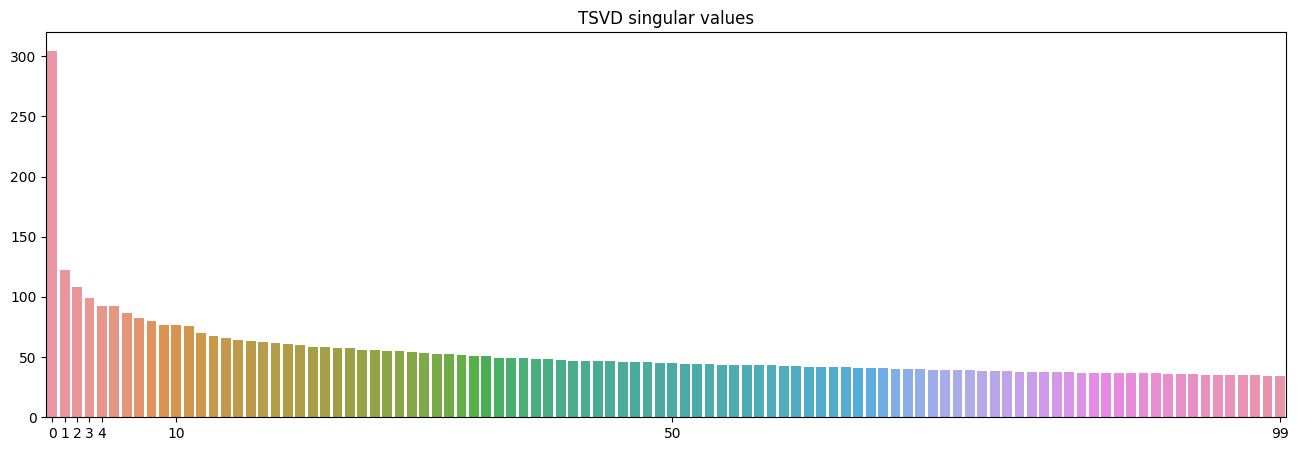

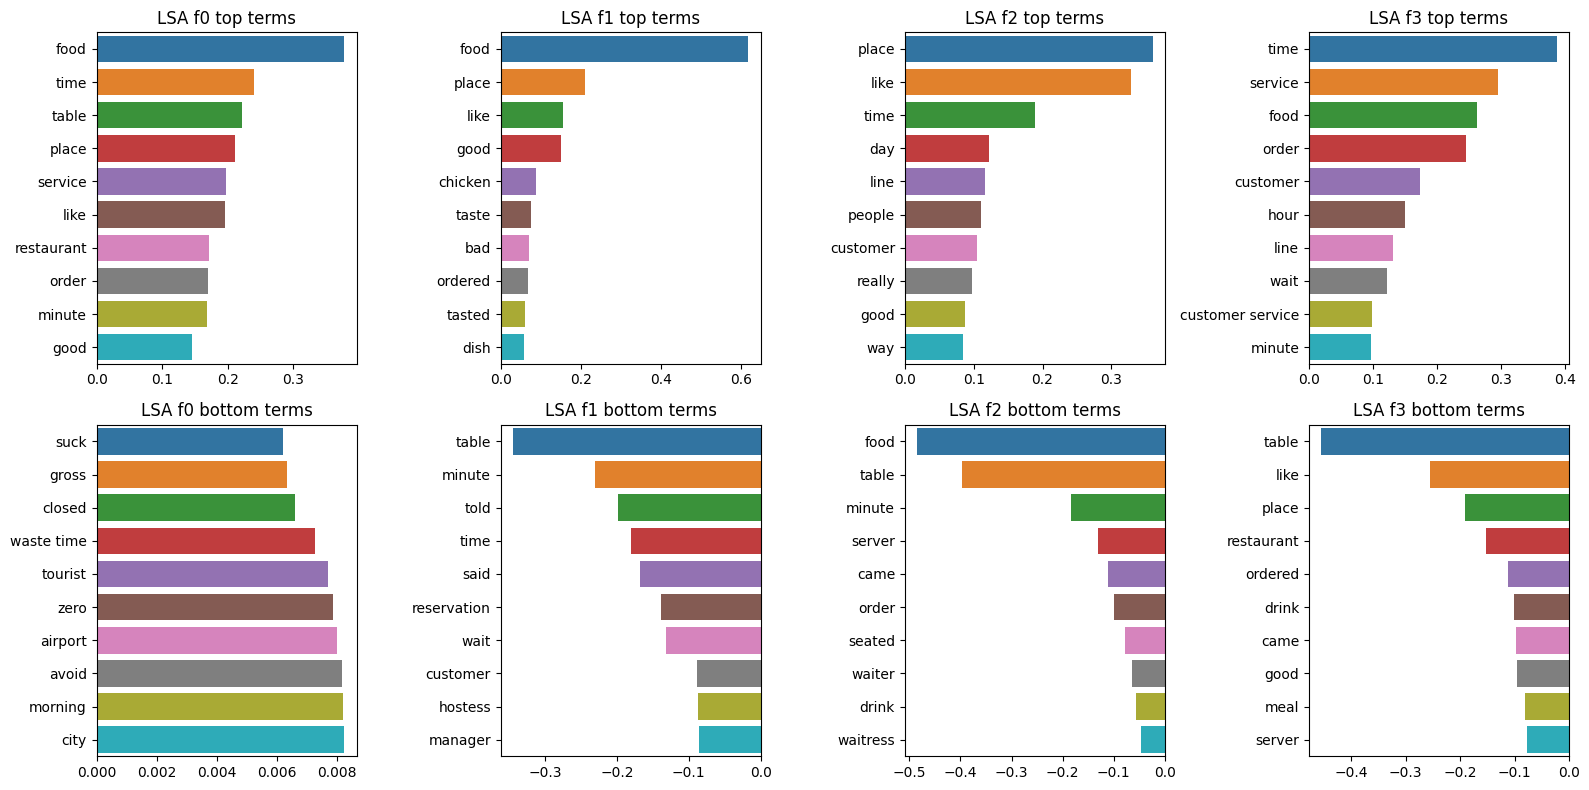

kv1 1.7562263011932373
kv3 1.6932823657989502


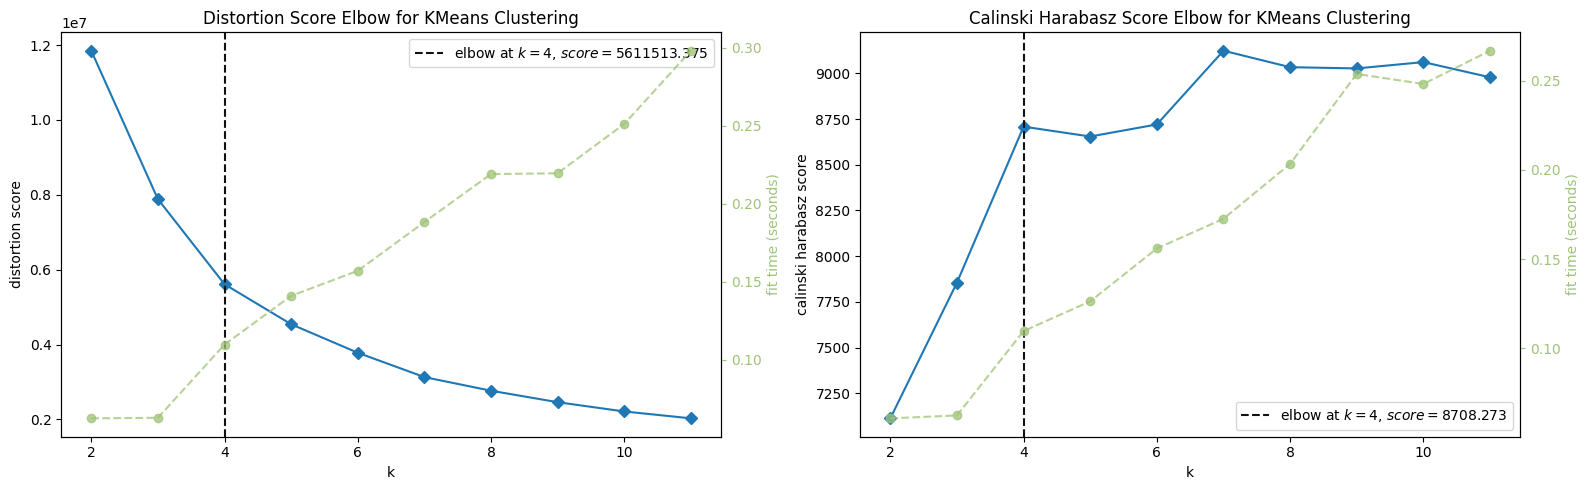

3 2.6789166927337646


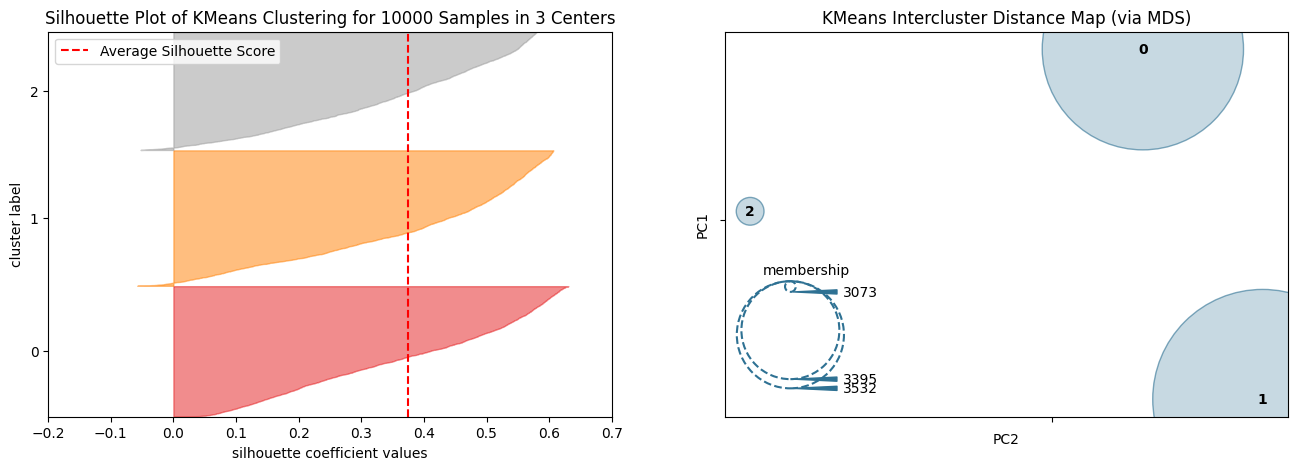

4 2.7061474323272705


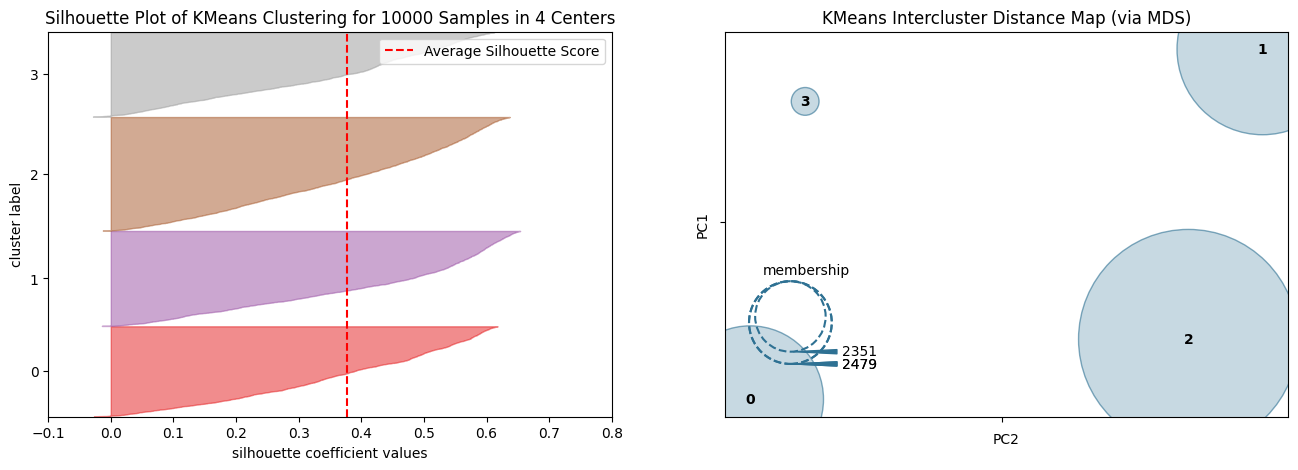

5 2.7751059532165527


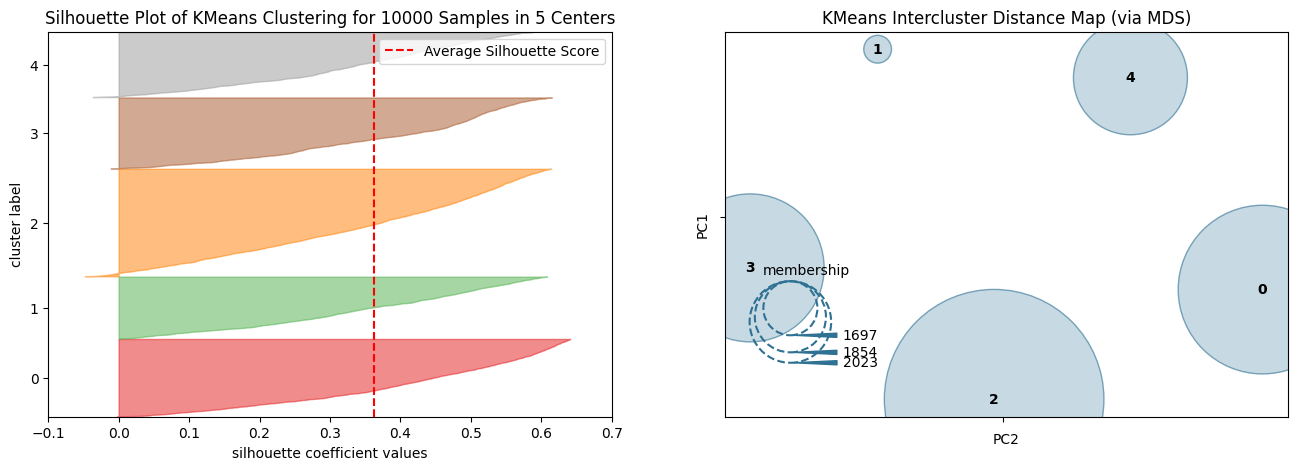

6 2.720550775527954


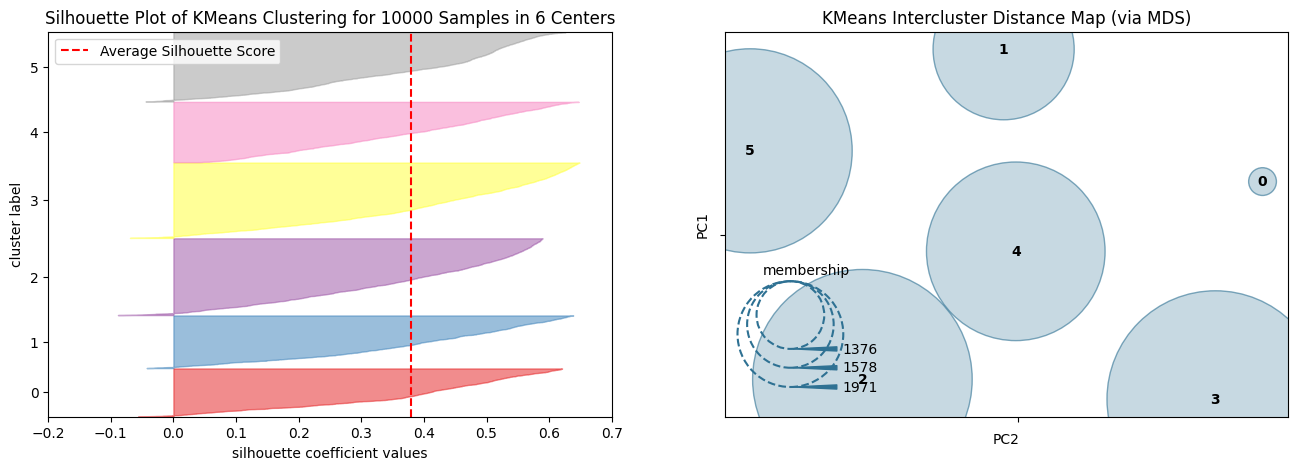

nombre de clusters: 3
clus
1       0.3525
2       0.3403
0       0.3072
dtype: float64
index des points les plus proches des centroides: [1999 9912 1948]
1999   wow never anywhere poorly something burning kitchen assume room smoky eye burning cry whole time one came apologize acknowledge running literally cry table horrible top small portion steak tough bill terrible experience beware

9912   although place awesome review really great yelp time told checked hostess told min wait said menu sat seat literally right front patiently waiting phone watching number line notice min checked three hostess working sat three group came open yelp get notification taken stand take two step show hostess red head working host stand snap say ya list like min ago never received notification one name ten name since sat right front looking every nothing told single thing although might issue notified certainly deserve attitude received red headed hostess also deserve eye roll said receive notification red

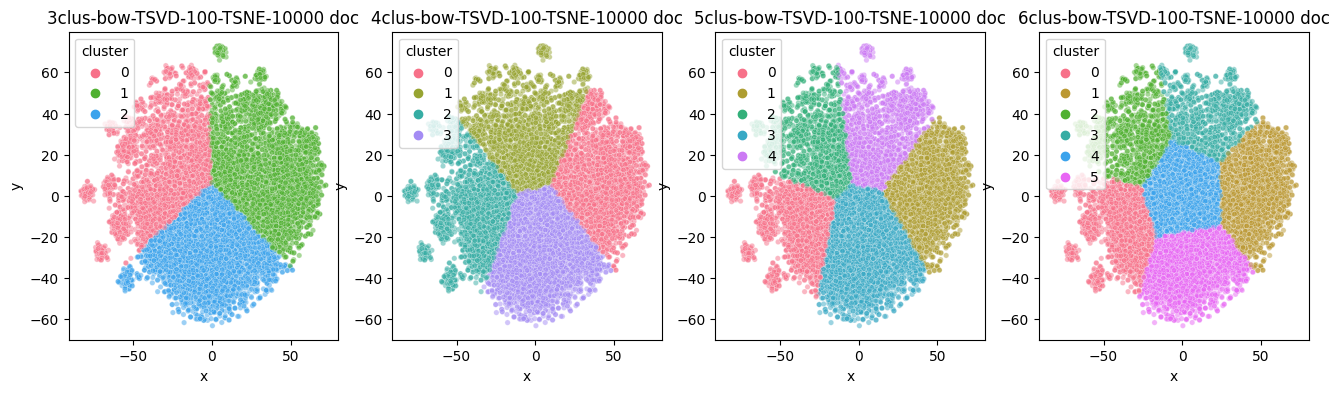

fit pipe: 43.1508207321167
nbwordperline apres filtre shape: (10000, 1)
tsvd: 100  composantes - variance expliquée: 0.39


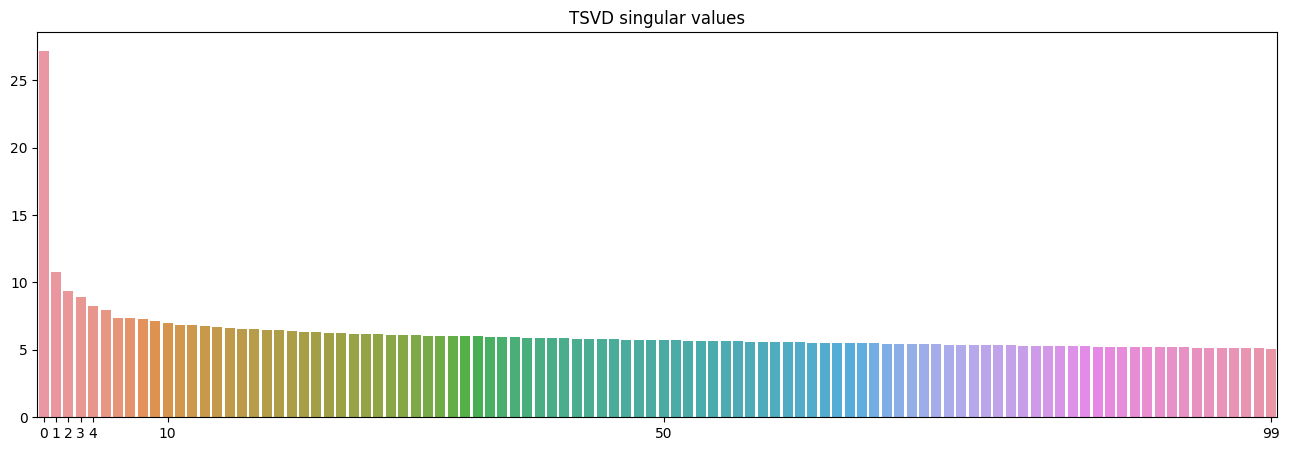

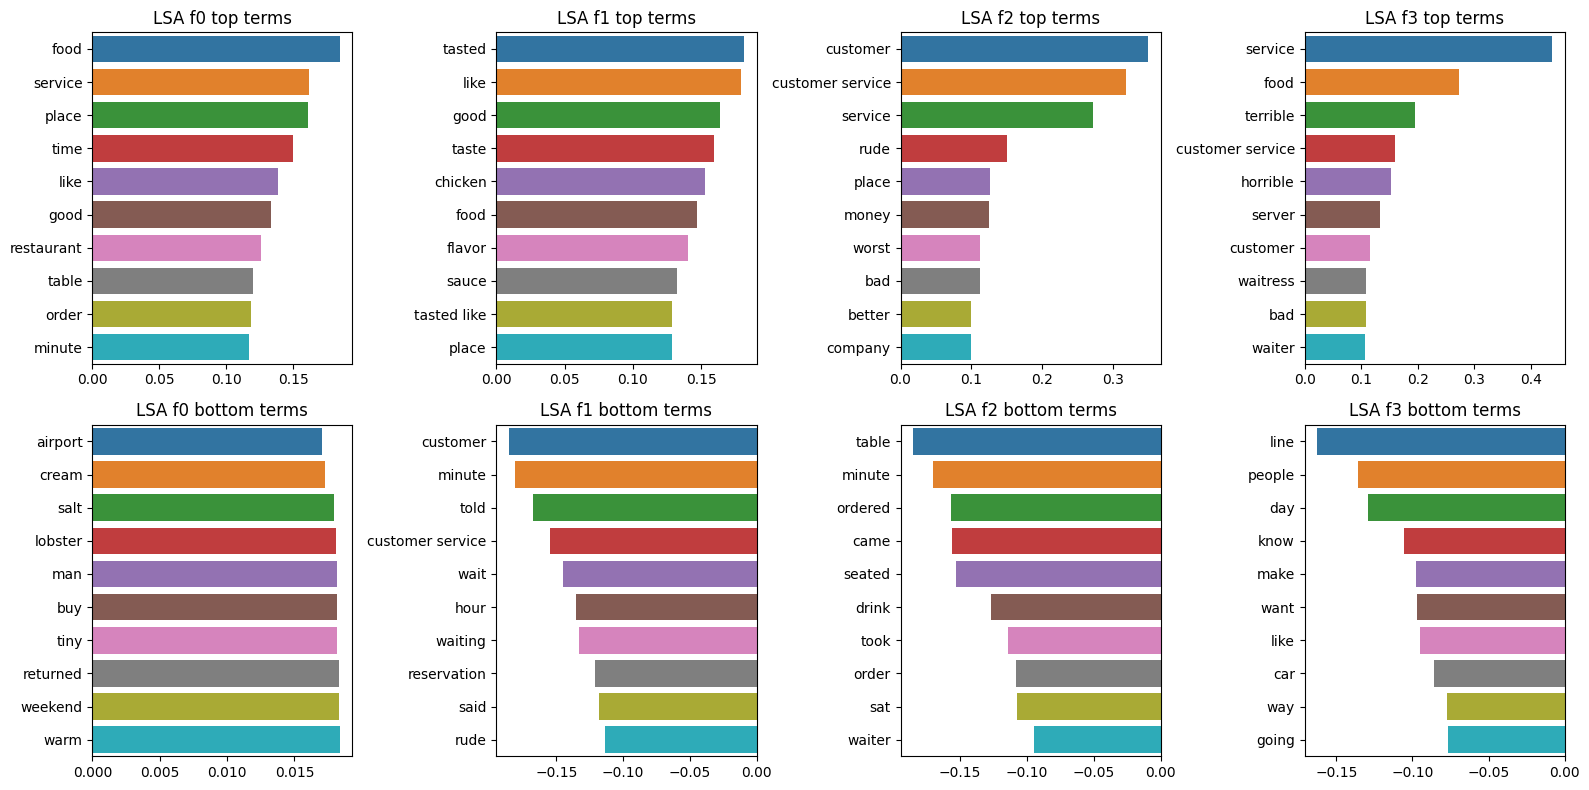

kv1 2.022470474243164
kv3 1.8244349956512451


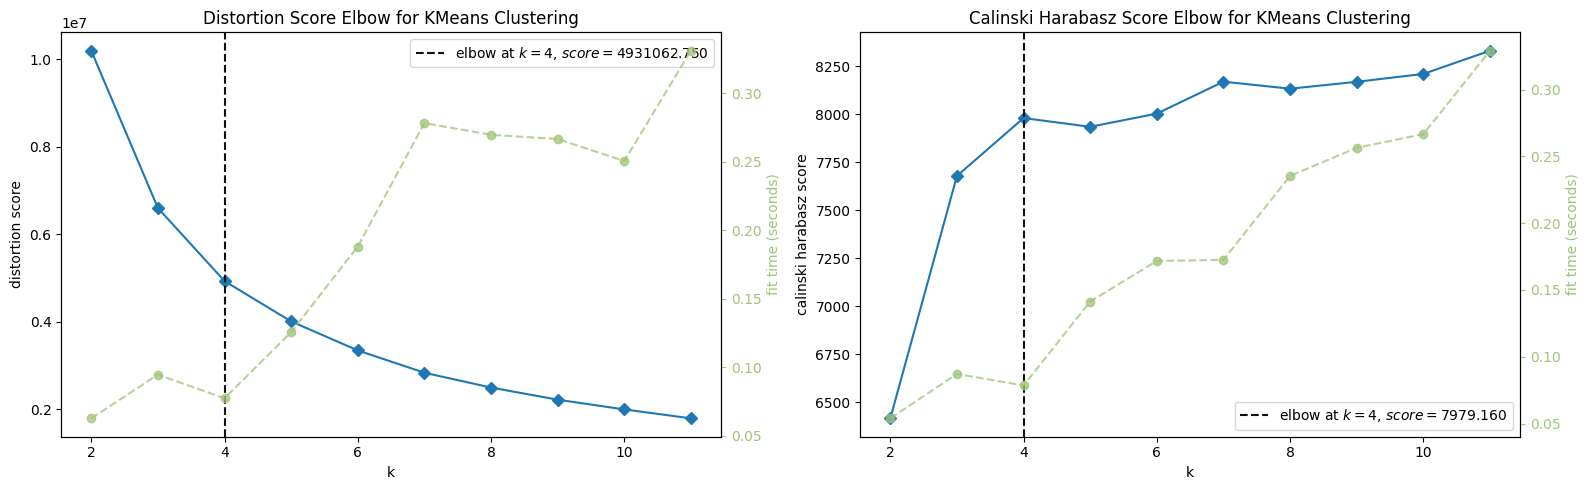

3 2.6826467514038086


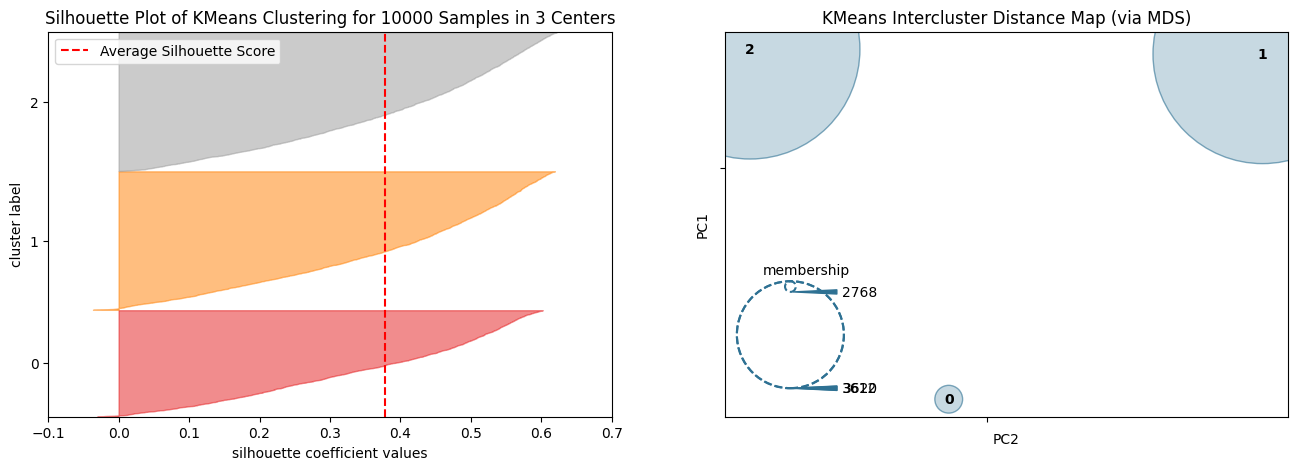

4 2.6884710788726807


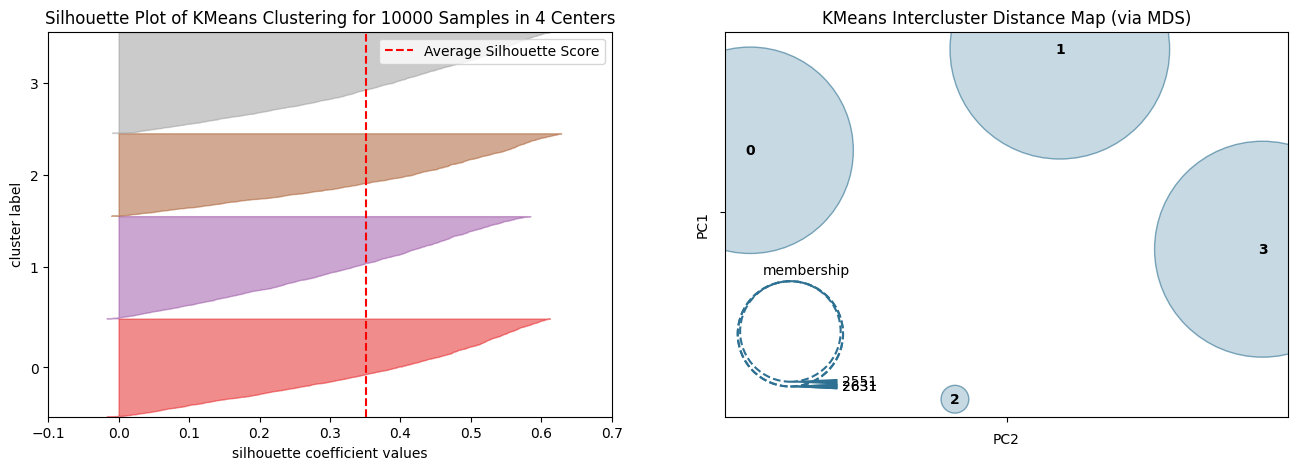

5 2.714489221572876


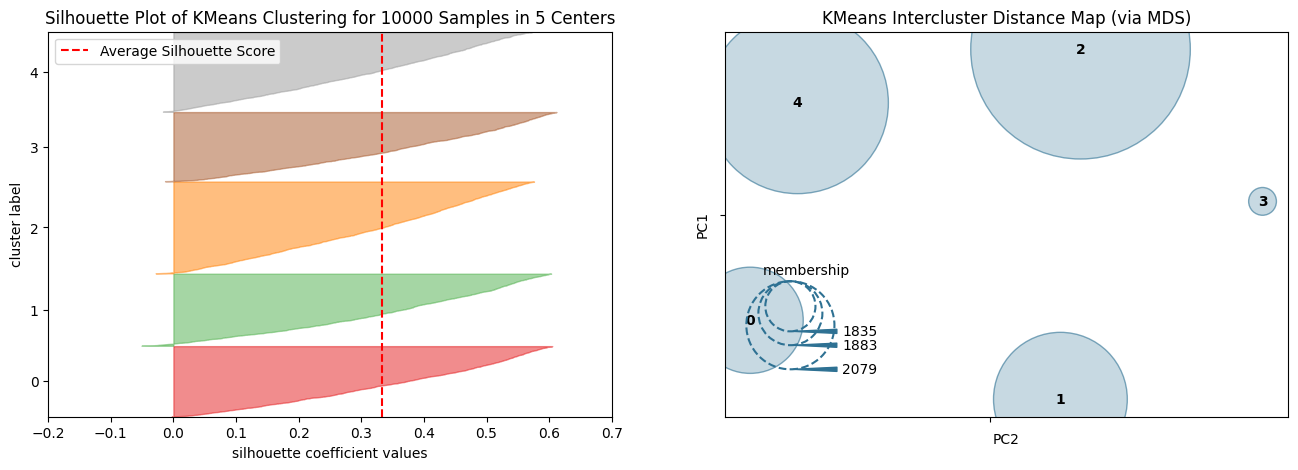

6 2.741011381149292


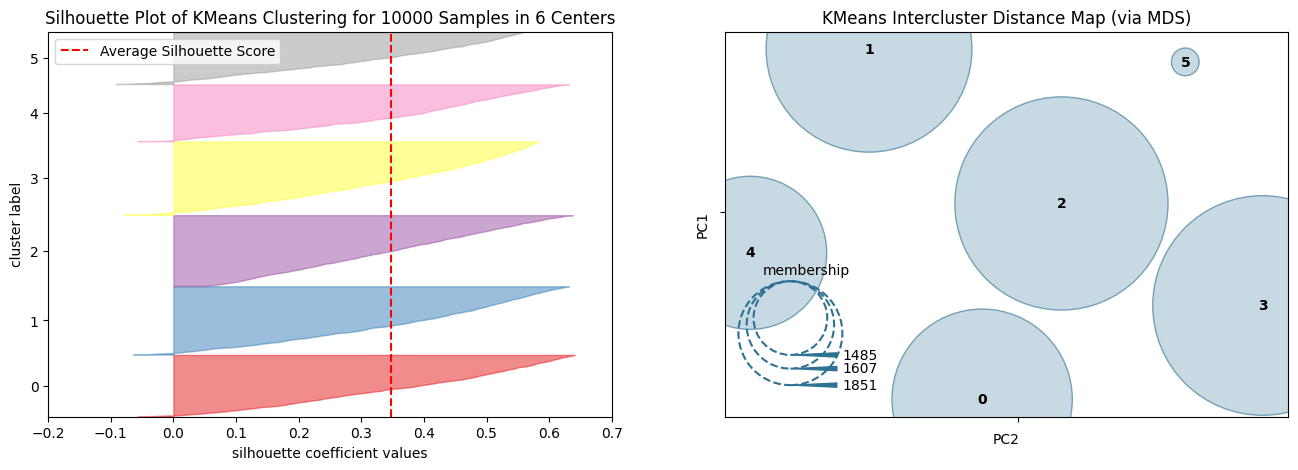

nombre de clusters: 3
clus
2       0.3631
1       0.3606
0       0.2763
dtype: float64
index des points les plus proches des centroides: [9573 6572 9631]
9573   terrible wait even get building find line back building empty table one person working one register kind business like kind person would wait long many great felt unvalued

6572   salt lick driftwood round rock thought food would like disappointed received food flavor taste good price wish food better upset people passing get experience real salt lick flavor food eat location know frustration

9631   place big mistake understand highly starter cold restaurant little seating immediately reservation empty special listed outside menu waitress spend minute explaining lot even remember put bad position ask wife ordered coffee consistently given cold coffee time exact even hot server come check table often reasonable course one waiter working came table said thank lady end sitting guy wife sister service terrible food anything write 

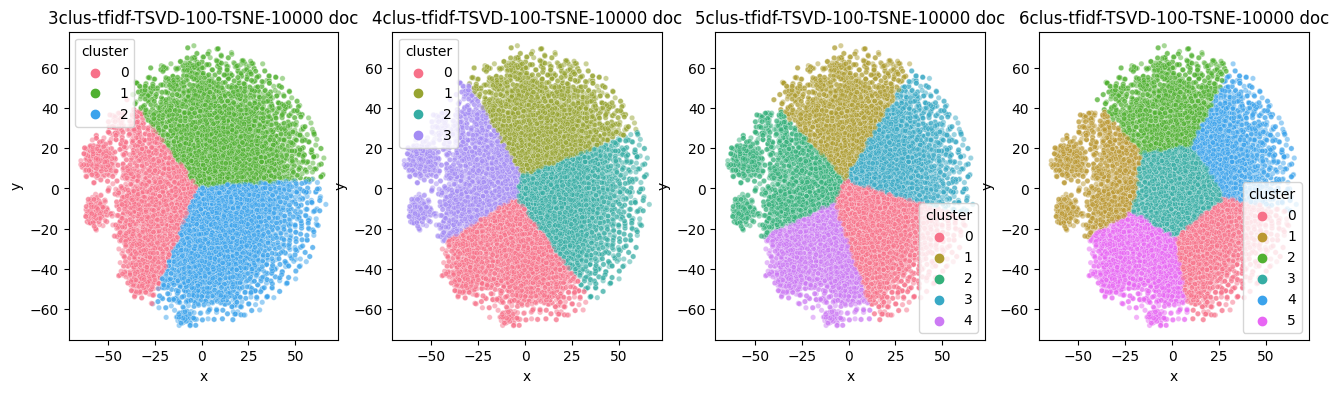

In [233]:
m1=text2clus(data=revfilt,corpus='text3', cat='stars', nbdoc=50000, binaire=False, max_f=8000, comptage='bow',
                     comp=100,perplex=30, ElbowVisualizer=True, Sil_ICD_Visualizer=True,Sil_ICD_K=[3, 4, 5, 6])
m2=text2clus(data=revfilt,corpus='text3', cat='stars', nbdoc=50000, binaire=True, max_f=8000, comptage='tfidf',
                     comp=100,perplex=30, ElbowVisualizer=True, Sil_ICD_Visualizer=True,Sil_ICD_K=[3, 4, 5, 6])

# word embedding : plongement de mots
* assez utilisé en traitement automatique des langues en s'appuyant sur des similarités sémentiques entre langage
* vectorisation **dense** de mots
    * les mots sont représentés par des vecteurs de nombres réels
    * des mots contexttuellement similaires ont des vecteurs proches
    * permet de diminuer la dimenson de representation (plongement)
    * une bonne representation permettra d'avoir l'equation vectoriel: roi-homme+femme=reine
    
* principe de base: **hypothèse distributionnelle**
    * **Les mots de sens proche auront des voisinages de mots (contexte) similaires**
    * 2 approches pour encoder le contexte:
        * approche à base de frequences decombrant les mots cooccurents avec un mot donné
            * analyse semantique latente
        * **approche word embedding**
            * predictive , permettant de prédire un mot à l'aide de son contexte ou le contexte à l'aide du mot
            * **word2vec** : approche reposant sur des reseaux de neurone pour l'entrainement à base de corpus tres volumineux
                * variante **CBOW continous bag of words**: qui cherche a **prédire un mot** avec ses voisins
                * variante **skip-gram** qui cherche à **predire le contexte voisin** à partir d'un mot central
            * **GloVe**
            
                
* cas de la traduction
    * step 1 : word embedding langage 1
    * step 2 : word embedding langage 2
    * step 3 : word embedding entre langue 1 et langue 2
        * initialisation: calcul du coefficient d'alignement de chaque mot du langage 1 avec chaque mot du langage 2
        * entrainement se basant sur la matrice d 'alignement
        
* utilisation: 
    * **traduction**
    * **analyse de sentiment**
    * **reconnaissance vocale**

## clustering bow / TFIDF et reduction GLOVE

In [235]:
#before TSNE : truncated SVD for sparse matrix & pca for dense matrix
#decrease dimensionality to 50 before TSNE otherwise highly time consuming (pas forcement verifié)

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import TruncatedSVD #aka LSA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import MaxAbsScaler, StandardScaler #scaler qui conserve la sparsity
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer,InterclusterDistance
from wordcloud import WordCloud
from gensim.models import KeyedVectors #pour lecture word emb
from scipy import sparse

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np


def text_we_2clus(data=revfilt,corpus='text3', cat='stars', nbdoc=1000, binaire=True, comptage='bow',
                     tsvd=True, comp=50,perplex=30, ElbowVisualizer=True, Sil_ICD_Visualizer=True, Sil_ICD_K=[3, 4, 5]):
    '''
        Word embedding glove vectorization after vectorization
        TSNE text vectorisation visualisation
        corpus=corpus
        cat=labels
        nbdoc=number of documents to vizualize
        binaire= binary for coutnvectorizer
        max_f= max features for coutnvectorizer
        comptage='bow' or 'tfidf'
        comp=number of components for tsvd (pca for sparse)
            
        perplex=tsne perplexity [5-50] : number of nearest neighboors (larger is dataset, larger should be perplex) 
        
        #on a choisi de garder les 400000 mots mais pour des histoires de memoire
        #il aurait mieux valu filtrer la matrice glove en fonction des mots du corpus
            '''
    ######################################
    #chargement de GLOVE en cas de word embedding désiré
    #en fait dans word2vec la premiere ligne contient le nombre de mots et la dimension et pas dans glove, d'ou le no_header)
    #possibilité de remplacer par le 300d
    start = time.time()
    glove2vec = KeyedVectors.load_word2vec_format('glove/glove.6B/glove.6B.50d.txt', binary=False, no_header=True)
    print('chargement glove:', time.time()-start)

    ######################################
    #balance class note
    nbk=int(nbdoc/5) #nb doc / nb class stars
    def sampling_k_elements(group, k=nbk):
        if len(group) < k:
            return group
        return group.sample(k)

    balanced = data.groupby(cat).apply(sampling_k_elements).reset_index(drop=True)

    
    #bad reviews selection: stars=1
    bal_filt=balanced.loc[(balanced[cat]==1),:]
    
    #note
    y = bal_filt[cat]
    
    ######################################
    start = time.time()
    #bow bag of words
    #on fixe le dictionnaire à celui de glove word embed: les filtres de tailles ne fonctionnent plus dans ce cas la
    #il faudra les faire à la main de facon à garder fixe le nombre de colonnes de mots à 400000
    bow = CountVectorizer(stop_words = 'english',
                          ngram_range = (1,1),
                          binary=binaire,
                          vocabulary=glove2vec.key_to_index) #tres important pour le glove
        #un bow binaire pour calculer les frequences pour appliquer des filtres
    bow4filt = CountVectorizer(stop_words = 'english',
                          ngram_range = (1,1),
                          binary=True,
                          vocabulary=glove2vec.key_to_index) #tres important pour le glove
    
    X_bow = bow.fit_transform(bal_filt[corpus])
    X_bow4filt = bow4filt.fit_transform(bal_filt[corpus])
    print('X_bow shape:',X_bow.shape)
    #print(bow.get_feature_names_out())
    
    ######################################
    #mise en place du vecteur de filtrage
    
    #frequence des mots
    tresh=X_bow4filt.sum(axis=0)/X_bow.shape[0]
    #filter
    tresh = np.where(tresh > 0.4, 0, tresh)
    tresh = np.where(tresh < 0.01, 0, tresh)
    tresh = np.where(tresh > 0, 1, 0)
        #important de le passer en sparse car X_bow est en sparse
        #mieux pour l homeneite des calculs
    tresh=sparse.csr_matrix(tresh)
    print('filtre shape:',tresh.shape)
        #elementwise multiplication
    X_bow=X_bow.multiply(tresh)
    print('X_bow apres filtre shape:',X_bow.shape)
    
    ######################################
    #comptage de mots par lignes apres filtre
    nbwordperline=(X_bow != 0).sum(axis=1)
    print('nbwordperline apres filtre shape:',nbwordperline.shape)
    ######################################
    #tfidf
    if comptage=='tfidf':
        tfidf = TfidfTransformer(use_idf=True)
        X_tfidf = tfidf.fit_transform(X_bow)
        #print(X_tfidf.shape)
    elif comptage=='bow':
        X_tfidf = X_bow
    ######################################
    #reduction de dimension par vectorisation GLOVE 
    #ne pas oublier de normaliser aprés
    we_vec=glove2vec.get_normed_vectors()
        #on le passe en sparse pour eviter les problèmes
    we_vec=sparse.csr_matrix(we_vec)
    print('matrice glove shape:',we_vec.shape)
        #multiplication de matrice
    X_vec=X_tfidf.dot(we_vec)
    print('matrice bow/tfidf post glove shape:',X_vec.shape)
        #normalisation L2 car le produit de matrice et une somme pondérée et non une moyenne
    normalizer = Normalizer(copy=False)
    X_vec_norm = normalizer.fit_transform(X_vec)
    print('matrice bow/tfidf post glove norm L2 shape:',X_vec_norm.shape)
    
    ######################################
    #reduction de dimension par TSVD mais avec le word embedding la matrice est dense , on peut donc appliquer une acp à ce stade
    if tsvd==True:
        tsvd = TruncatedSVD(n_components=comp, n_iter=100, random_state=42)
        X_tsvd=tsvd.fit_transform(X_vec_norm)
        #https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8
        #normalisaton L2 de chaque sample apres TSVD
        #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
        X_tsvd_norm = normalizer.fit_transform(X_tsvd)
        print('matrice bow/tfidf post tsvd norm L2 shape:',X_tsvd_norm.shape)
    else:
        X_tsvd_norm=X_vec_norm
    
    #tsne
    tsne=TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplex,n_jobs=-1)
    X_tsne = tsne.fit_transform(X_tsvd_norm)
                    #
    #X_tsne = normalizer.fit_transform(X_tsne)
    
    print('fit time:',time.time()-start)
    ######################################

    
    #visualisation
    #https://seaborn.pydata.org/tutorial/color_palettes.html

    df2=pd.DataFrame(X_tsne)
    df2.columns=['x','y']
    
    
    ###################### Kmeans
    if ElbowVisualizer == True:
        
        start = time.time()

        model = KMeans()
        plt.rcParams["figure.figsize"] = [16, 5]
        #plt.rcParams["figure.autolayout"] = True
        f, axes = plt.subplots(1, 2)

        # distorsion
        visualizer1 = KElbowVisualizer(model, k=(2, 12), ax=axes[0])
        visualizer1.fit(df2.values)    # Fit the data to the visualizer
        visualizer1.finalize()  # prepare the chart : title /label
        
        print('kv1', time.time()-start)
        
        #start = time.time()
        # silhouette
        #visualizer2 = KElbowVisualizer(
            #model, k=(2, 12), metric='silhouette', ax=axes[1])
        # , timings=False)
        #un peu long par rapport aux autres metriques
        #visualizer2.fit(doc2vec_sc)    # Fit the data to the visualizer
        #visualizer2.finalize()  # prepare the chart : title /label
        #print('kv2', time.time()-start)
        start = time.time()
        
        # CALINSKI
        visualizer3 = KElbowVisualizer(
            model, k=(2, 12), metric='calinski_harabasz', ax=axes[1])
        # , timings=False)
        visualizer3.fit(df2.values)    # Fit the data to the visualizer
        visualizer3.finalize()  # prepare the chart : title /label
        print('kv3', time.time()-start)
        
        plt.show()
        
        
    ############################################################################################################################
    plt.rcParams["figure.figsize"] = [16, 5]
    plt.rcParams["figure.autolayout"] = False
    
    
    if Sil_ICD_Visualizer == True:

        for i in Sil_ICD_K:
            f, axes = plt.subplots(1, 2)
            
            start = time.time()
            model = KMeans(n_clusters=i, init='k-means++')
            model.fit(df2.values)
            
            visualizer = SilhouetteVisualizer(
                model, ax=axes[0], is_fitted=True)
            # deja fité juste au dessus
            # Fit the data to the visualizer
            visualizer.fit(df2.values)
            visualizer.finalize()
            # prepare the chart : title /label

            visualizer = InterclusterDistance(
                model, ax=axes[1], is_fitted=True)
            # deja fité juste au dessus
            # Fit the data to the visualizer
            visualizer.fit(df2.values)
            visualizer.finalize()  # prepare the chart : title /label
            print(i, time.time()-start)
            
            plt.show()
            
            ##############################
        plt.rcParams["figure.figsize"] = [16, 4]
        plt.rcParams["figure.autolayout"] = False
        f, axes = plt.subplots(1, len(Sil_ICD_K))
        
        for c,i in enumerate(Sil_ICD_K):
            km=KMeans(n_clusters=i, init='k-means++')
            y_km=km.fit_predict(df2)
            df_km=pd.concat([df2,pd.DataFrame(y_km,columns=['cluster'])],axis=1)
            
            #pourcentage d'individus par label
            print('nombre de clusters:',i)
            clusters = km.labels_.tolist()
            print(pd.DataFrame(clusters, columns = ['clus']).value_counts(normalize=True))
            
            #individus les plus proche des centroides (on recuperer leurs index)
            closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df2)
            print('index des points les plus proches des centroides:',closest)
            for j in closest:
                print(j,' ',bal_filt['text3'].iloc[j])
                print()
            
            
            #recuperation des mots les plus importants par cluster / approximation par le plus proche centroide
            
            #on est obligé de todense car sparse
            #argsort donne l'indice de colonne dans notre cas par classement croissant
            # le ::-1 permet de faire du decending en np, en inversant les colonnes , en les flippant par son milieu:
            def position_mot(data,size=10):
                start=time.time()
                h=[[]]
                for ind in range(data.shape[0]):
                    vec=data[ind,:].todense().argsort()[:, ::-1]
                    h=np.append(h,vec[:,:size])
                print('position mot time:',time.time()-start)
                #reshape en matrice de size colonnes
                h = np.reshape(h,(-1,size))
                h=h.astype(int)
                return h

            if comptage=='bow':
                order_matrix = position_mot(data=X_bow,size=10)
            elif comptage=='tfidf':
                order_matrix = position_mot(data=X_tfidf,size=10)
            #print(order_bow.shape)
            
            print(order_matrix.shape)
            print(order_matrix.dtype)
            
            #boucle sur les differents clusters
            for count,ind in enumerate(closest):
                #print(ind)
                print(order_matrix[ind,:10])
                print("Cluster %d words:" % count, end='')
                #max nb words à afficher entre 10 et le nombre max de mots apres filtre par doc
                maxnb=int(min(10,nbwordperline[ind]))
                #print(maxnb)
                #for col in order_bow[ind, :10]: 
                print(bow.get_feature_names_out()[order_matrix[ind,:maxnb]])
                print() #add whitespace

            sns.scatterplot(data=df_km,x='x', y='y', hue='cluster', alpha=0.5, palette=sns.color_palette("husl", i),s=15, ax=axes[c])
            axes[c].set_title(str(i)+'clus-'+str(comptage)+'-GLOVE-TSNE-'+str(nbk)+' doc')
            
            
        plt.show()
    return bal_filt

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


chargement glove: 10.538548469543457
X_bow shape: (10000, 400000)
filtre shape: (1, 400000)
X_bow apres filtre shape: (10000, 400000)
nbwordperline apres filtre shape: (10000, 1)
matrice glove shape: (400000, 50)
matrice bow/tfidf post glove shape: (10000, 50)
matrice bow/tfidf post glove norm L2 shape: (10000, 50)
fit time: 37.16580677032471
kv1 1.6851906776428223
kv3 1.7697663307189941


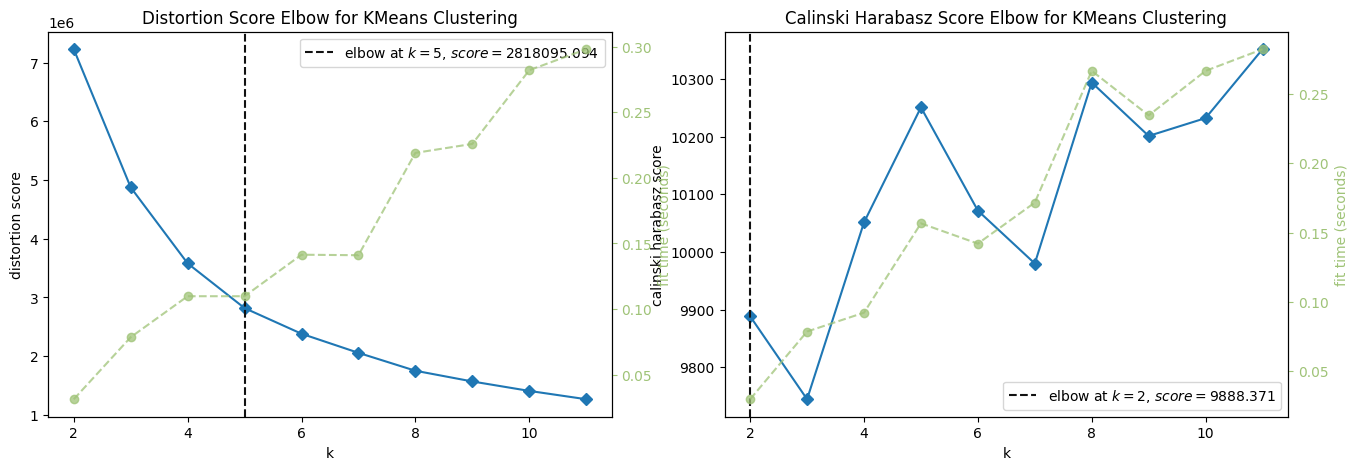

3 2.609895944595337


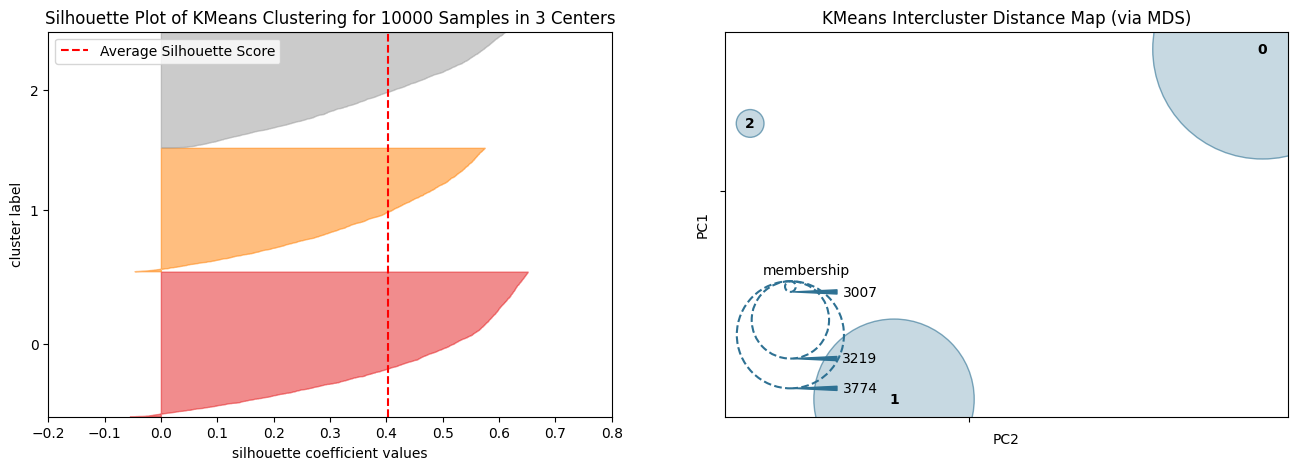

4 2.698756694793701


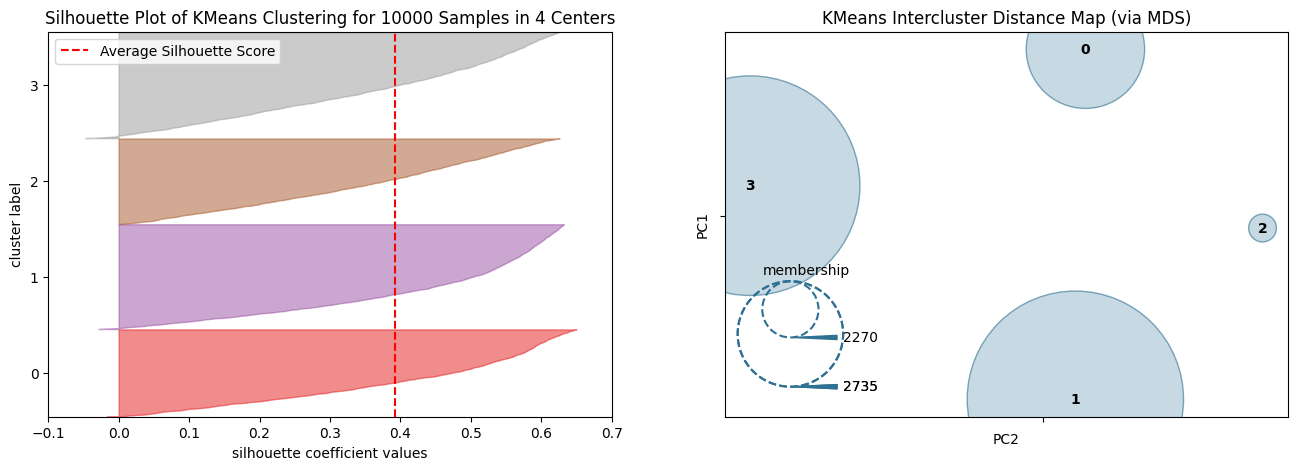

5 2.649911642074585


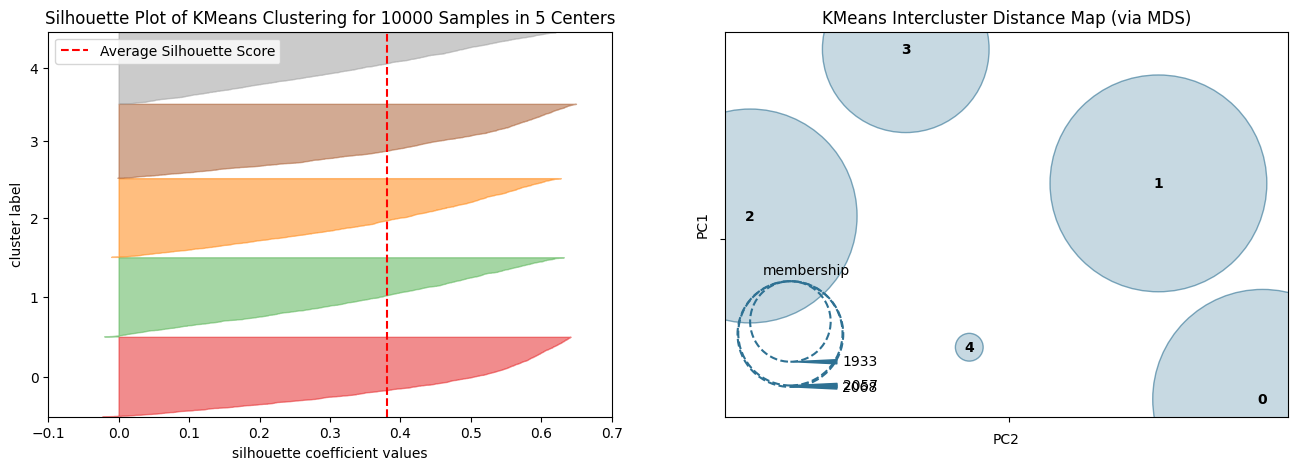

nombre de clusters: 3
clus
2       0.3774
0       0.3219
1       0.3007
dtype: float64
index des points les plus proches des centroides: [6236 3261 6204]
6236   giving place benefit doubt multiple occasion conclusion worst sizzle pie location counter service never great recent visit staff rude worse twice row wait whole pie horrifically time recently point hour pizza go counter help clearly well feeling mutual ill hell place

3261   server coffee cup friend hand server made friend cry birthday party hope corporate read review never given restaurant one star review even begin let preface server brewhouse cant imagine server th street st birthday party server great first way earning tip table even sandwich picky as super grateful friend st birthday one intoxicated sober said go bathroom e took group girl would server mention name stopped e arm battery anyone he lucky call cop said go bathroom threw would nobody clean get e figure serious told would go outside ° weather throw trash told m

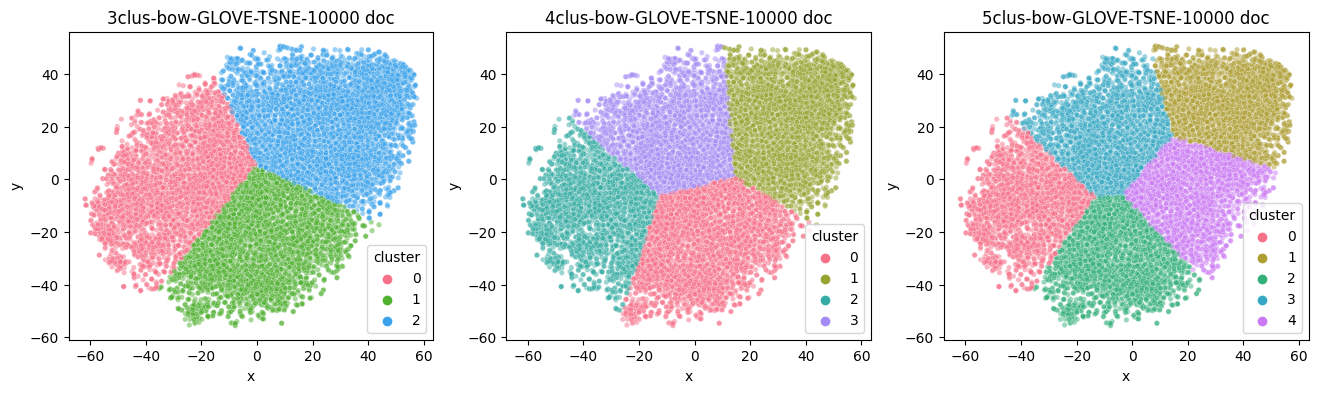

chargement glove: 10.586505889892578
X_bow shape: (10000, 400000)
filtre shape: (1, 400000)
X_bow apres filtre shape: (10000, 400000)
nbwordperline apres filtre shape: (10000, 1)
matrice glove shape: (400000, 50)
matrice bow/tfidf post glove shape: (10000, 50)
matrice bow/tfidf post glove norm L2 shape: (10000, 50)
fit time: 38.64516234397888
kv1 1.7775578498840332
kv3 1.7401390075683594


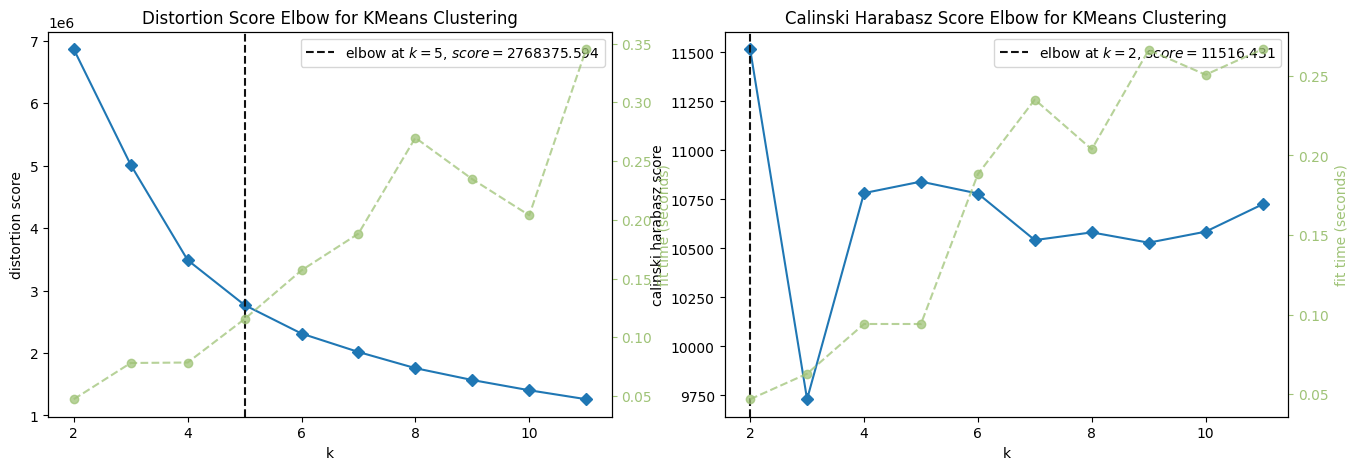

3 2.676182508468628


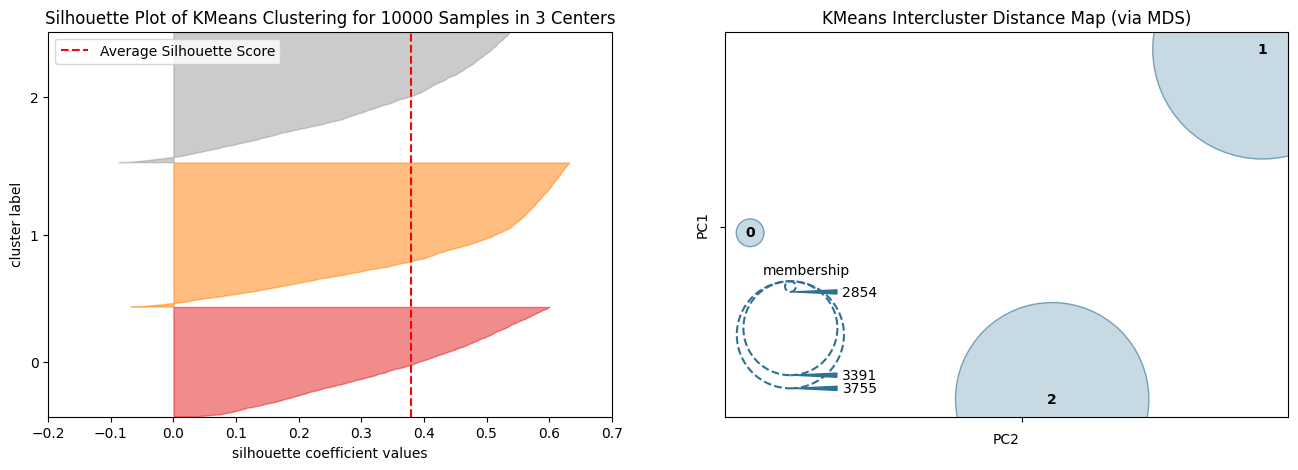

4 2.6827337741851807


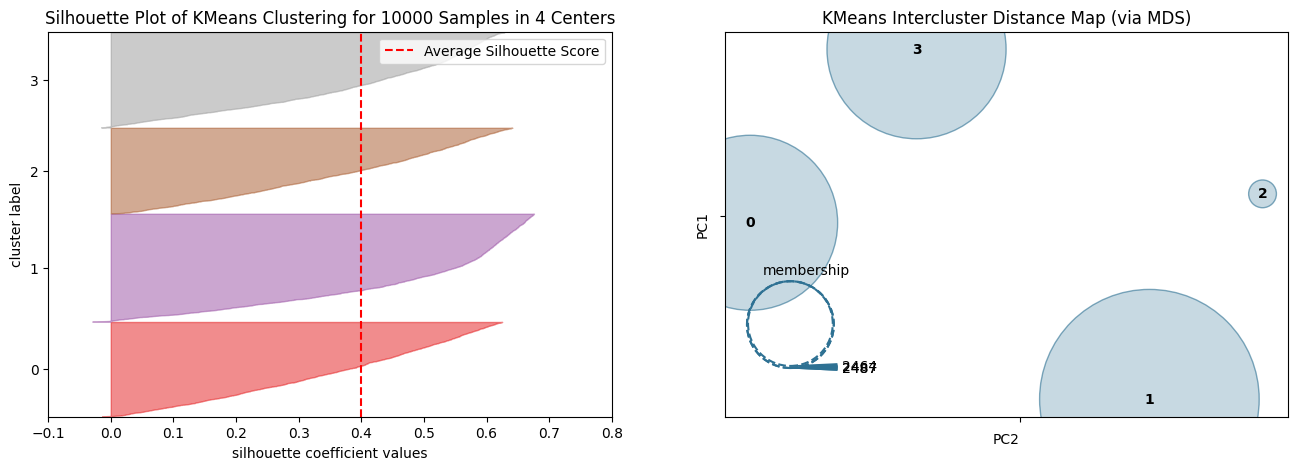

5 2.688001871109009


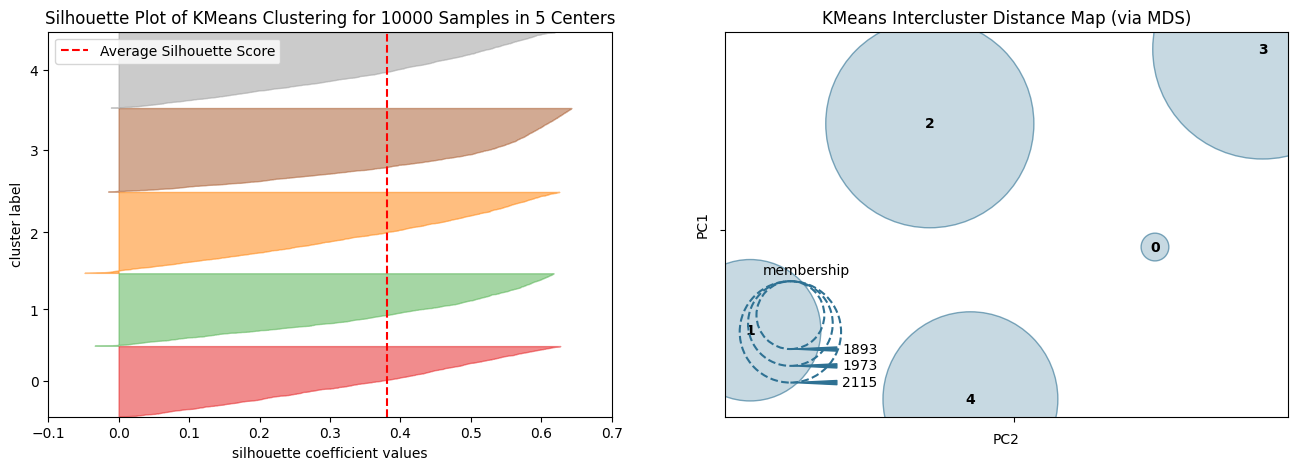

nombre de clusters: 3
clus
1       0.3813
0       0.3357
2       0.2830
dtype: float64
index des points les plus proches des centroides: [3913 4542 4614]
3913   came event today say going day also say free let know many people party excited child said half number party bust

4542   dietary restriction even lactose intolerance accommodate presentation important eating something preface review saying way feel like restaurant need cater every single dietary restriction totally meal exactly restaurant mean make sick pretty boring meal dietary restriction brunch poor today first time also last poor reservation seated right away good minute server came greet point dietary restriction informed eat dairy handle baked good cheese milk cream table told id basket could put cream goat cheese side literally presentation probably throw presentation cheese sprinkled top actual hell thrown response word came mouth cant eat food presentation matter tell shed cheese instead side like eats dairy would go

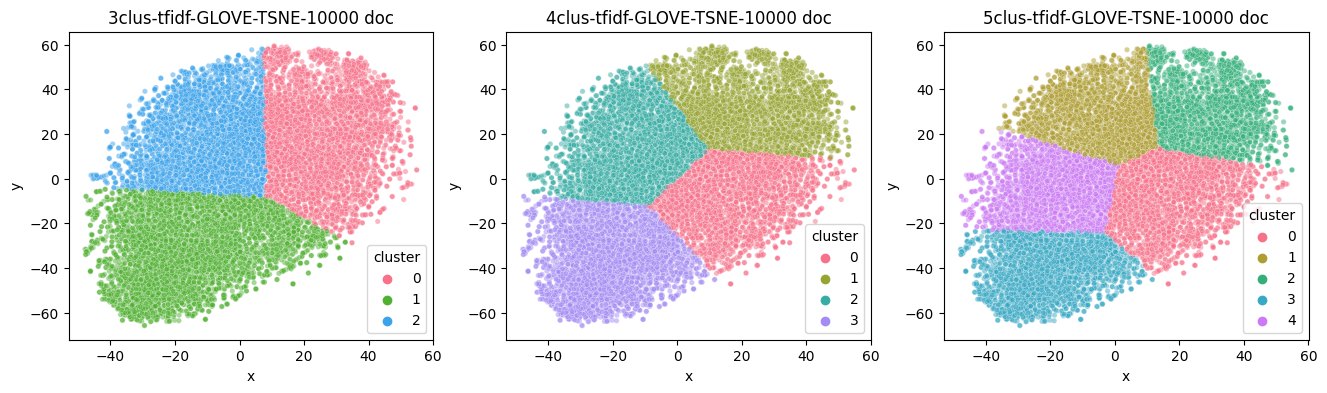

In [236]:
h1=text_we_2clus(data=revfilt,corpus='text3', cat='stars', nbdoc=50000, binaire=False, comptage='bow',
                     tsvd=False, comp=50,perplex=30, ElbowVisualizer=True, Sil_ICD_Visualizer=True, Sil_ICD_K=[3,4,5])
h2=text_we_2clus(data=revfilt,corpus='text3', cat='stars', nbdoc=50000, binaire=False, comptage='tfidf',
                     tsvd=False, comp=50,perplex=30, ElbowVisualizer=True, Sil_ICD_Visualizer=True, Sil_ICD_K=[3, 4, 5])


# topic modeling LDA
https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05
* fonctionne mal avec tfidf (pas de sens)
* modele generatif cherchant à calculer P(Y|X) grace à bayes: P(X|Y)=P(Y|X)P(X)/P(Y)
* assumptions: doc = mixture of topics with words with probability of distribution
* LDA = matrix factorization technique
    * matrix X (lines=N documents, columns= M vocabulary size, value= frequency of the word j in the document i)
    * LDA convert X into M1 (N doc,K topics) et M2 (K topics,M vocabulary size)
    * LDA uses sampling techniques to improve hteses matrices which already provides topic word and document topic distribution
    
    * for every topic 2 P calculated:
        * P1=P(topic t|doc d)=proportion of words in doc d assigned to topic t
        * P2=P(word w|topic t)=proportion of assignements to topic t over the corpus that come from word w)
        
* how to improve topic modelling:
    * reducing the dimensionality of the sparse document term matrix:
        * frequency filter
        * pos tag filter
        * batch wise LDA 
        
* **gensim vs sckit learn**
    * sklearn faster 9x
    * perplexity calculation very slow on sklearn 
* score de coherence
https://towardsdatascience.com/understanding-topic-coherence-measures-4aa41339634c

In [24]:
import sys
!{sys.executable} -m pip install gensim

In [18]:
#split doc/word en liste de listes / sorte de tokenisation
#68000 docs classes 1 sur la coupe intiale des 1000 plus gros restaurants
start = time.time()
doc_clean = [doc.split() for doc in revfilt.loc[revfilt.stars==1,'text3'].head(100000)]
print(time.time()-start)

0.6096630096435547


## creation bi tri grams

In [19]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS, FrozenPhrases
#detect phrases on colocation counts
#min_count:  Ignore all words and bigrams with total collected count lower than this value
#threshold: Represent a score threshold for forming the phrases (higher means fewer phrases)

bigram = Phrases(doc_clean, min_count=10,threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)
trigram = Phrases(bigram[doc_clean], threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)

#permet de rendre plus light en memoire , à utiliser si pas  d update prevu
bigram_mod = FrozenPhrases(bigram)
trigram_mod = FrozenPhrases(trigram)

In [20]:
print(doc_clean[1])
print(trigram[bigram[doc_clean]][1])
print(trigram_mod[bigram_mod[doc_clean]][1])

['absolutely', 'terrible', 'seated', 'quickly', 'bar', 'wait', 'almost', 'hour', 'order', 'place', 'seat', 'enough', 'people', 'justify', 'hour', 'two', 'people', 'get', 'food', 'pretentious', 'horrible', 'service', 'atmosphere', 'joke', 'important', 'tell', 'friend', 'dining', 'experience', 'actually', 'enjoy', 'place']
['absolutely_terrible', 'seated_quickly', 'bar', 'wait', 'almost_hour', 'order', 'place', 'seat', 'enough', 'people', 'justify', 'hour', 'two', 'people', 'get', 'food', 'pretentious', 'horrible', 'service', 'atmosphere', 'joke', 'important', 'tell', 'friend', 'dining_experience', 'actually', 'enjoy', 'place']
['absolutely_terrible', 'seated_quickly', 'bar', 'wait', 'almost_hour', 'order', 'place', 'seat', 'enough', 'people', 'justify', 'hour', 'two', 'people', 'get', 'food', 'pretentious', 'horrible', 'service', 'atmosphere', 'joke', 'important', 'tell', 'friend', 'dining_experience', 'actually', 'enjoy', 'place']


## filtrage et creation des BOW

In [21]:
#bibliotheque topic modelling LDA
import gensim
from gensim import corpora

# To use sparse matrices
from scipy.sparse import csr_matrix
import numpy as np

import matplotlib.pyplot as plt
# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dic = corpora.Dictionary(doc_clean)
dic_wbi = corpora.Dictionary(bigram[doc_clean])
dic_wtri = corpora.Dictionary(trigram[bigram[doc_clean]])

#no_below: word au minimum dans no_below docs du corpus
#no_above: word dans une proportion de co inferieure à no_above corpus
#on peut filtrer à 0.5 de toutes les facons le mot food qui est le plus frequent n'apparait que dans 49% des docs (voir plus haut countvectorizer binaire)
#le no_below de 1000 est ok pour 68000 docs mais peut etre trop cuttant pour les bigrams
dic.filter_extremes(no_below=1000, no_above=0.5)
dic_wbi.filter_extremes(no_below=1000, no_above=0.5)
dic_wtri.filter_extremes(no_below=1000, no_above=0.5)

# Convert document of corpus into the bag-of-words (BoW) format = 
# list of (token_id, token_count) tuples

doc_term_matrix = [dic.doc2bow(doc) for doc in doc_clean]
doc_term_matrix_wbi = [dic_wbi.doc2bow(doc) for doc in bigram[doc_clean]]
doc_term_matrix_wtri = [dic_wtri.doc2bow(doc) for doc in trigram[bigram[doc_clean]]]


# Create sparse matrix (not mandatory but reduce memory consumption)
def makesparse(mycorpus, ncolumns):
    data, row, col = [], [], []
    #enumerate permet de boucler en ayant le counter ici cc qui commence à 0
    for cc, doc in enumerate(mycorpus):
        for word in doc:
            #row index for data i, correspond au counter
            row.append(cc)
            #col index for data i, token id
            col.append(word[0])
            #data i , token count
            data.append(word[1])
    X = csr_matrix((np.array(data), (np.array(row), np.array(col))), shape=(cc+1, ncolumns))
    #where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k]
    return X


# Create sparse matrix
X = makesparse(doc_term_matrix, len(dic))
print('X Shape:\t{}'.format(X.shape))

X Shape:	(68980, 658)


In [46]:
print(len(dic))
print(len(dic_wbi))
print(len(dic_wtri))

658
590
562


## LDA single core recherche du nombre de topics

138.1003224849701
110.02333498001099
115.23965573310852
118.8084192276001
113.25482249259949
118.05560445785522
116.50968146324158
115.69298577308655
115.75745677947998
117.32649946212769


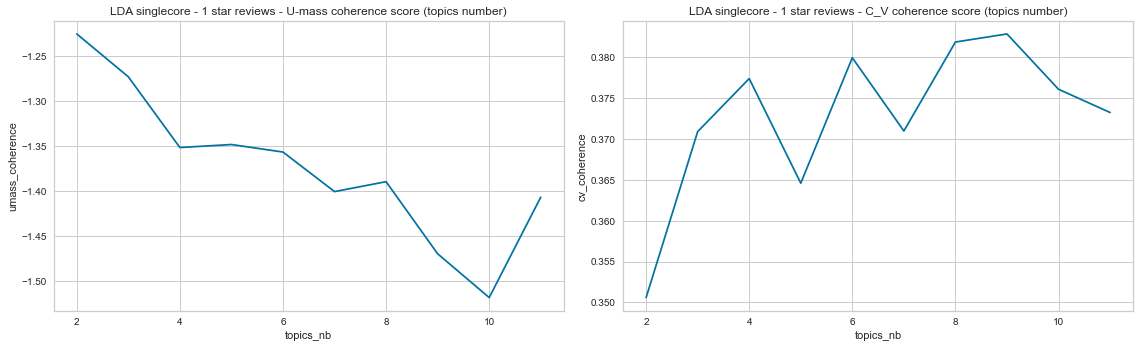

In [50]:
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models import LdaModel

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

#variables
dt_matrix=doc_term_matrix_wbi
dico=dic_wbi
corpus=bigram[doc_clean]
#single core model or multicore model
mod='single' 

#loop on topic number
coherence=[]
for num_topic in range(2,12):
    start = time.time()
    #optimised for multi core processor
    if mod=='multi':
        lda = LdaMulticore(dt_matrix,
                                num_topics=num_topic, 
                                id2word = dico,
                                chunksize=20000,
                                passes=2,
                                iterations=500,
                                eval_every=None)
    elif mod=='single':
        lda = LdaModel(dt_matrix,
                                num_topics=num_topic, 
                                id2word = dico,
                                chunksize=20000,
                                passes=2,
                                iterations=500,
                                eval_every=None, 
                                alpha='auto',
                                eta='auto')
    # Compute Perplexity
    # a measure of how good the model is. lower the better.
    # time consuming
    #print('\nPerplexity: ', lda1.log_perplexity(doc_term_matrix1)) 
    
    # Compute Coherence Score
    # relative distance between words within a topic
    # 1) 0<C_V<1  :.3 bad .4 low (need probably to change topic number) .55 ok .65 good .7 nice .8 unlikely .9 probably wrong
    # 2) -14<uMass<14

    #how to get higher coherences
    # alpha=.1 eta =0.01 or 0.001 etc #enfin a voir
    #work on raw data
    coherence_lda_umass = CoherenceModel(model=lda, texts=corpus, dictionary=dico, coherence='u_mass').get_coherence()
    coherence_lda_cv = CoherenceModel(model=lda, texts=corpus, dictionary=dico, coherence='c_v').get_coherence()
    
    coherence=coherence+[[num_topic,coherence_lda_umass,coherence_lda_cv]]
    print(time.time()-start)
    
coherence=pd.DataFrame(coherence, columns=['topics_nb','umass_coherence','cv_coherence'])

plt.rcParams["figure.figsize"] = [16, 5]
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.lineplot(data=coherence, x='topics_nb', y='umass_coherence', markers=True, dashes=False, ax=axes[0])
sns.lineplot(data=coherence, x='topics_nb', y='cv_coherence', markers=True, dashes=False, ax=axes[1])
if mod=='single':
    axes[0].set_title('LDA singlecore - 1 star reviews - U-mass coherence score (topics number)')
    axes[1].set_title('LDA singlecore - 1 star reviews - C_V coherence score (topics number)')
elif mod=='multi':
    axes[0].set_title('LDA multicore - 1 star reviews - U-mass coherence score (topics number)')
    axes[1].set_title('LDA multicore - 1 star reviews - C_V coherence score (topics number)')
plt.show()

## LDA multi core recherche du nombre de topics

104.55147528648376
73.24064207077026
65.75421380996704
62.202879190444946
62.20920157432556
58.65702486038208
59.07966685295105
59.05178689956665
58.70788049697876
57.34488368034363


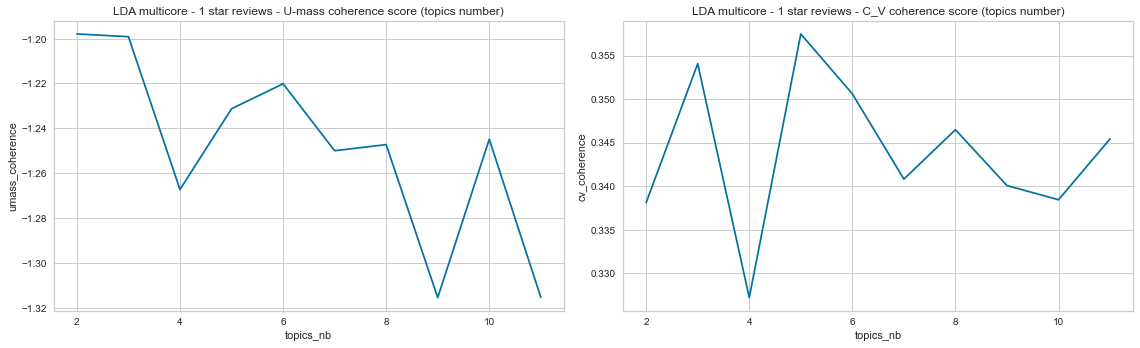

In [52]:
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models import LdaModel

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

#variables
dt_matrix=doc_term_matrix_wbi
dico=dic_wbi
corpus=bigram[doc_clean]
#single core model or multicore model
mod='multi' 

#loop on topic number
coherence=[]
for num_topic in range(2,12):
    start = time.time()
    #optimised for multi core processor
    if mod=='multi':
        lda = LdaMulticore(dt_matrix,
                                num_topics=num_topic, 
                                id2word = dico,
                                chunksize=20000,
                                passes=2,
                                iterations=500,
                                eval_every=None)
    elif mod=='single':
        lda = LdaModel(dt_matrix,
                                num_topics=num_topic, 
                                id2word = dico,
                                chunksize=20000,
                                passes=2,
                                iterations=500,
                                eval_every=None, 
                                alpha='auto',
                                eta='auto')
    # Compute Perplexity
    # a measure of how good the model is. lower the better.
    # time consuming
    #print('\nPerplexity: ', lda1.log_perplexity(doc_term_matrix1)) 
    
    # Compute Coherence Score
    # relative distance between words within a topic
    # 1) 0<C_V<1  :.3 bad .4 low (need probably to change topic number) .55 ok .65 good .7 nice .8 unlikely .9 probably wrong
    # 2) -14<uMass<14

    #how to get higher coherences
    # alpha=.1 eta =0.01 or 0.001 etc #enfin a voir
    #work on raw data
    coherence_lda_umass = CoherenceModel(model=lda, texts=corpus, dictionary=dico, coherence='u_mass').get_coherence()
    coherence_lda_cv = CoherenceModel(model=lda, texts=corpus, dictionary=dico, coherence='c_v').get_coherence()
    
    coherence=coherence+[[num_topic,coherence_lda_umass,coherence_lda_cv]]
    print(time.time()-start)
    
coherence=pd.DataFrame(coherence, columns=['topics_nb','umass_coherence','cv_coherence'])

plt.rcParams["figure.figsize"] = [16, 5]
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.lineplot(data=coherence, x='topics_nb', y='umass_coherence', markers=True, dashes=False, ax=axes[0])
sns.lineplot(data=coherence, x='topics_nb', y='cv_coherence', markers=True, dashes=False, ax=axes[1])
if mod=='single':
    axes[0].set_title('LDA singlecore - 1 star reviews - U-mass coherence score (topics number)')
    axes[1].set_title('LDA singlecore - 1 star reviews - C_V coherence score (topics number)')
elif mod=='multi':
    axes[0].set_title('LDA multicore - 1 star reviews - U-mass coherence score (topics number)')
    axes[1].set_title('LDA multicore - 1 star reviews - C_V coherence score (topics number)')
plt.show()

## LSA

18.993141889572144
18.596107244491577
19.09165930747986
18.814282417297363
19.49675488471985
19.188610792160034
19.894320964813232
20.31104302406311
19.957337617874146
20.22559142112732


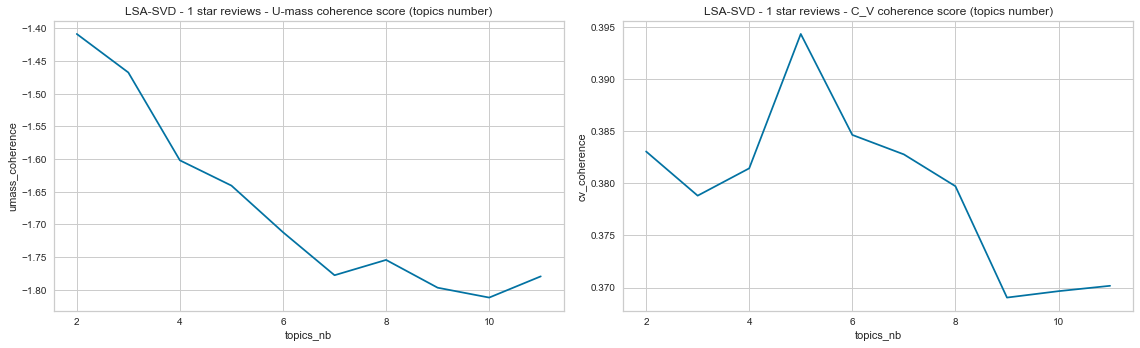

In [53]:
#une petite alternative à la LDA la vieille LSA qui est en fait une SVD (autrement dit une ACP )

from gensim.models import CoherenceModel
from gensim.models import LsiModel


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)



#variables
dt_matrix=doc_term_matrix_wbi
dico=dic_wbi
corpus=bigram[doc_clean]
#single core model or multicore model
mod='lsa' 

#loop on topic number
coherence=[]
for num_topic in range(2,12):
    start = time.time()
    #optimised for multi core processor
    if mod=='lsa':
        lsa = LsiModel(dt_matrix,
                                num_topics=num_topic, 
                                id2word = dico,
                                chunksize=20000)

    # Compute Perplexity
    # a measure of how good the model is. lower the better.
    # time consuming
    #print('\nPerplexity: ', lda1.log_perplexity(doc_term_matrix1)) 
    
    # Compute Coherence Score
    # relative distance between words within a topic
    # 1) 0<C_V<1  :.3 bad .4 low (need probably to change topic number) .55 ok .65 good .7 nice .8 unlikely .9 probably wrong
    # 2) -14<uMass<14

    #how to get higher coherences
    # alpha=.1 eta =0.01 or 0.001 etc #enfin a voir
    #work on raw data
    coherence_lsa_umass = CoherenceModel(model=lsa, texts=corpus, dictionary=dico, coherence='u_mass').get_coherence()
    coherence_lsa_cv = CoherenceModel(model=lsa, texts=corpus, dictionary=dico, coherence='c_v').get_coherence()
    
    coherence=coherence+[[num_topic,coherence_lsa_umass,coherence_lsa_cv]]
    print(time.time()-start)
    
coherence=pd.DataFrame(coherence, columns=['topics_nb','umass_coherence','cv_coherence'])

plt.rcParams["figure.figsize"] = [16, 5]
#plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.lineplot(data=coherence, x='topics_nb', y='umass_coherence', markers=True, dashes=False, ax=axes[0])
sns.lineplot(data=coherence, x='topics_nb', y='cv_coherence', markers=True, dashes=False, ax=axes[1])
if mod=='lsa':
    axes[0].set_title('LSA-SVD - 1 star reviews - U-mass coherence score (topics number)')
    axes[1].set_title('LSA-SVD - 1 star reviews - C_V coherence score (topics number)')

plt.show()

## Visualisation des topics

## 4 topics LDA

In [24]:
# Set up log to terminal
#import logging
#logging.disable(logging.NOTSET)
#logging.disable(level=logging.INFO)
#logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.DEBUG)

#logger will help to define passes & iteration with eval_every
#check at the final passes all the doc converge 
# look for: 2016-06-21 15:40:06,753 - 
    #gensim.models.ldamodel - DEBUG - 68/1566 documents converged within 400 iterations"
    
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models import LdaModel

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt    
    
    
    
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.setLevel(logging.ERROR)


from gensim.models import LdaModel
#LDA train
#il existe des scores de coherence pour connaitre le nb de topic optimal
start = time.time()
#chunksize : how many doc are processed at a time (bigger is faster)
#passes(epochs): controls how often we train the model on the entire corpus
#iterations (defaut=50 short): controls how often we repeat a loop over each doc
dt_matrix=doc_term_matrix_wbi
dico=dic_wbi
corpus=bigram[doc_clean]
num_topics=4
lda = LdaModel(dt_matrix,
               num_topics=num_topics,
               id2word = dico,
               chunksize=20000,
               passes=2,
               iterations=500,
               eval_every=1,
               alpha='auto',
               eta='auto')
print(time.time()-start)
logger.setLevel(logging.ERROR)

#get the topics with the highest coherence score
#return pair(topic representation, score) for each topic
top_topics = lda.top_topics(dt_matrix, coherence='u_mass', topn=num_topics)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

print(lda.print_topics(num_topics=num_topics, num_words=10))

206.81142568588257
Average topic coherence: -1.0357.
[(0, '0.028*"food" + 0.026*"place" + 0.019*"get" + 0.017*"time" + 0.015*"go" + 0.014*"like" + 0.013*"people" + 0.012*"service" + 0.011*"one" + 0.011*"good"'), (1, '0.024*"table" + 0.017*"told" + 0.016*"minute" + 0.016*"would" + 0.015*"order" + 0.014*"wait" + 0.014*"time" + 0.014*"said" + 0.013*"get" + 0.012*"restaurant"'), (2, '0.030*"food" + 0.023*"place" + 0.019*"good" + 0.015*"like" + 0.013*"ordered" + 0.011*"one" + 0.011*"restaurant" + 0.009*"even" + 0.009*"taste" + 0.009*"would"'), (3, '0.033*"food" + 0.018*"service" + 0.014*"came" + 0.014*"ordered" + 0.013*"restaurant" + 0.013*"time" + 0.013*"server" + 0.013*"order" + 0.012*"one" + 0.012*"table"')]


## 4 topics LSA

In [58]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.setLevel(logging.ERROR)


from gensim.models import LsiModel
#LDA train
#il existe des scores de coherence pour connaitre le nb de topic optimal
start = time.time()
#chunksize : how many doc are processed at a time (bigger is faster)
#passes(epochs): controls how often we train the model on the entire corpus
#iterations (defaut=50 short): controls how often we repeat a loop over each doc
dt_matrix=doc_term_matrix_wbi
dico=dic_wbi
corpus=bigram[doc_clean]
num_topics=5
lsa = LsiModel(dt_matrix,
               num_topics=num_topics,
               id2word = dico,
               chunksize=20000)
print(time.time()-start)
logger.setLevel(logging.ERROR)


print(lsa.print_topics(num_topics=num_topics, num_words=10))

1.4111301898956299
[(0, '0.334*"food" + 0.207*"time" + 0.205*"table" + 0.197*"place" + 0.190*"get" + 0.188*"one" + 0.184*"would" + 0.159*"order" + 0.157*"restaurant" + 0.150*"back"'), (1, '-0.751*"food" + 0.270*"table" + 0.192*"told" + -0.172*"place" + 0.169*"said" + 0.159*"would" + -0.144*"good" + 0.120*"minute" + 0.098*"wait" + 0.095*"back"'), (2, '-0.519*"table" + 0.398*"place" + -0.324*"food" + 0.232*"like" + -0.173*"minute" + 0.163*"get" + -0.135*"server" + 0.132*"one" + -0.130*"came" + 0.130*"go"'), (3, '-0.537*"order" + 0.512*"table" + 0.374*"place" + 0.189*"restaurant" + -0.162*"back" + -0.137*"ordered" + 0.135*"people" + -0.126*"said" + -0.114*"came" + -0.110*"drink"'), (4, '0.308*"wait" + 0.278*"get" + -0.270*"restaurant" + 0.268*"time" + 0.237*"minute" + -0.237*"ordered" + 0.221*"food" + -0.193*"came" + 0.187*"hour" + 0.169*"line"')]


In [ ]:
import sys
#!{sys.executable} -m pip install pyLDAvis --user

## visualisation des 4 topics LDA avec pyLDAvis

In [25]:
#exploring the Intertopic Distance
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
plt.style.use('default') #specially for dark theme

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, doc_term_matrix_wbi, dictionary=dico)
pyLDAvis.save_html(vis, "C:/Users/wesh/OCR/P6/lda_4.html")
#They propose a measure called relevance, which is similar to exclusivity as defined by Bischof and Airoldi (2012): 
#it denotes the degree to which a term appears in a particular topic to the exclusion of others. 
#Relevance is based on another metric, lift – defined by Taddy (2011),
#which is the ratio of a term’s probability within a topic to its margin probability across the corpus. 
#On one hand, it decreases the ranking of globally common terms, but on the other, 
#it gives a high ranking to rare terms that occur in a single topic

#Relevance is denoted by λ, the weight assigned to the probability of a term in a topic relative to its lift. 
#When λ = 1, the terms are ranked by their probabilities within the topic (the ‘regular’ method) 
#while when λ = 0, the terms are ranked only by their lift. The interface allows to adjust the value of λ between 0 and 1.

#The authors of the paper conducted a study to determine whether there was an optimal value for λ regarding the use of relevance to aid topic interpretation 
#and found that value to be 0.6, as described in section 3 of their paper. In any case, it is very handy to be able to adjust that any time